In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score


print('pandas version : ', pd.__version__)
print('numpy version : ', np.__version__)
print('matplotlib version : ', matplotlib.__version__)
print('seaborn version : ', sns.__version__)

# statistic tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

# scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB


pandas version :  2.2.2
numpy version :  1.26.4
matplotlib version :  3.9.0
seaborn version :  0.13.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', None)

# Load Data

In [4]:
df = pd.read_csv('marketing_campaign_data.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [6]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.nunique()

Unnamed: 0             2240
ID                     2240
Year_Birth               59
Education                 5
Marital_Status            6
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntCoke                 776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(2240, 30)

In [10]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Unnamed: 0,int64,0,0.00,2240,"[0, 1, 2, 3, 4]"
1,ID,int64,0,0.00,2240,"[5524, 2174, 4141, 6182, 5324]"
2,Year_Birth,int64,0,0.00,59,"[1957, 1954, 1965, 1984, 1981]"
3,Education,object,0,0.00,5,"[S1, S3, S2, SMA, D3]"
4,Marital_Status,object,0,0.00,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
5,Income,float64,24,1.07,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
6,Kidhome,int64,0,0.00,3,"[0, 1, 2]"
7,Teenhome,int64,0,0.00,3,"[0, 1, 2]"
8,Dt_Customer,object,0,0.00,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
9,Recency,int64,0,0.00,100,"[58, 38, 26, 94, 16]"


In [11]:
num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
      'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
cat = ['Education', 'Marital_Status']
date = ['Dt_Customer']

In [12]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# Analisis Univariate

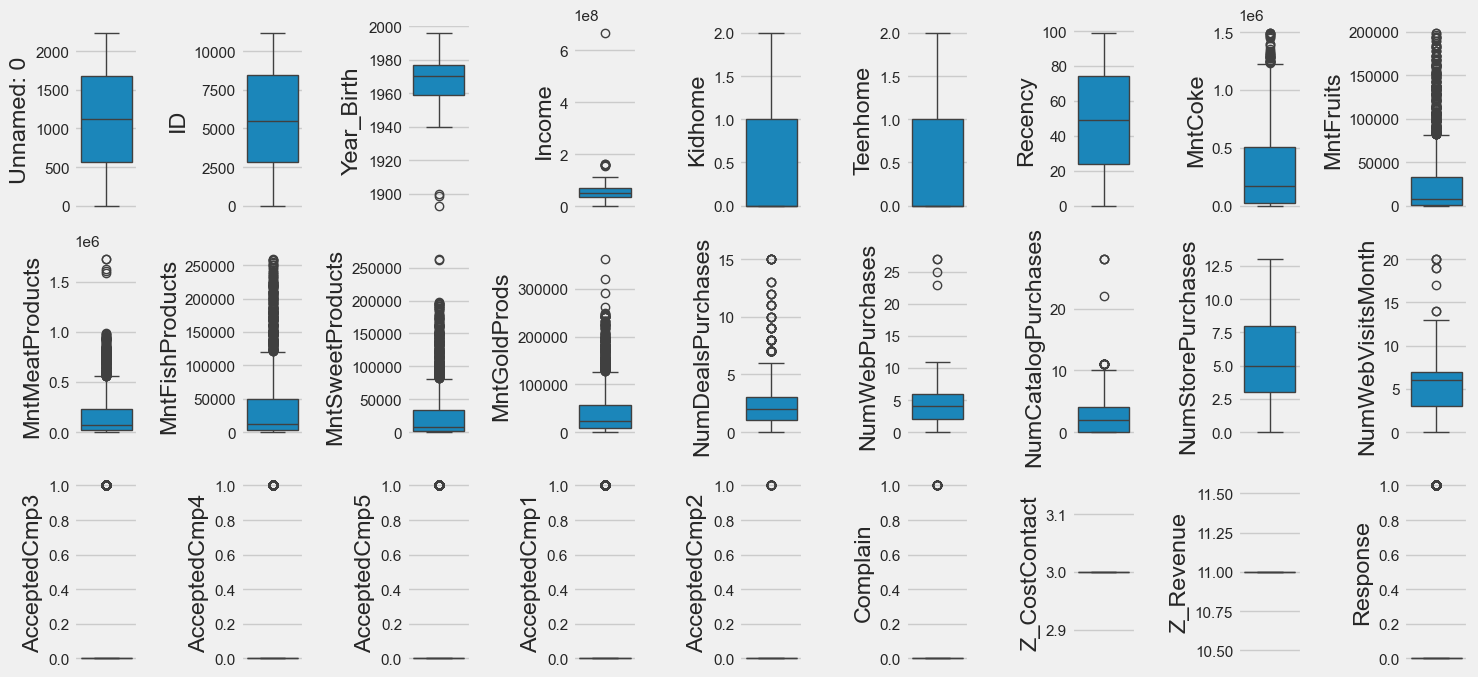

In [14]:
num = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()

plt.figure(figsize=(15, 7))
for i in range(0, len(num)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df[num[i]], orient='v')
    plt.tight_layout()

ValueError: num must be an integer with 1 <= num <= 20, not 21

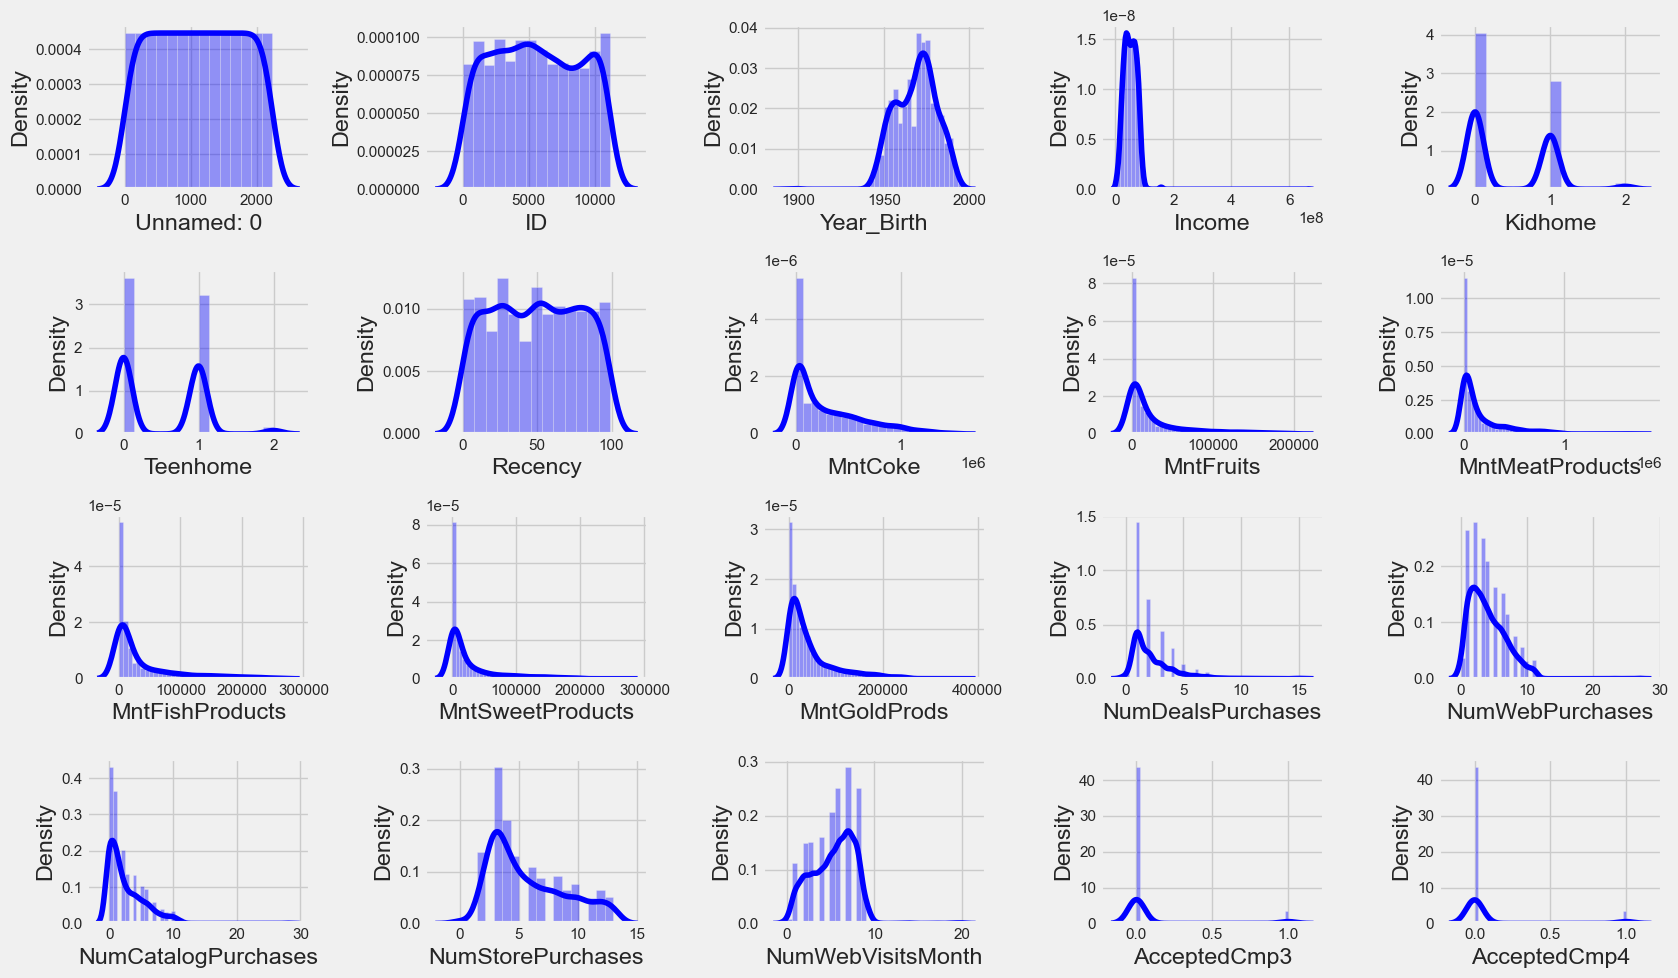

In [15]:
# cek distribusi menggunakan distplot:
plt.figure(figsize=(17, 10))
for i in range(0, len(num)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[num[i]], color = 'blue')
    plt.tight_layout()
plt.show()

# Analisis Multivariate

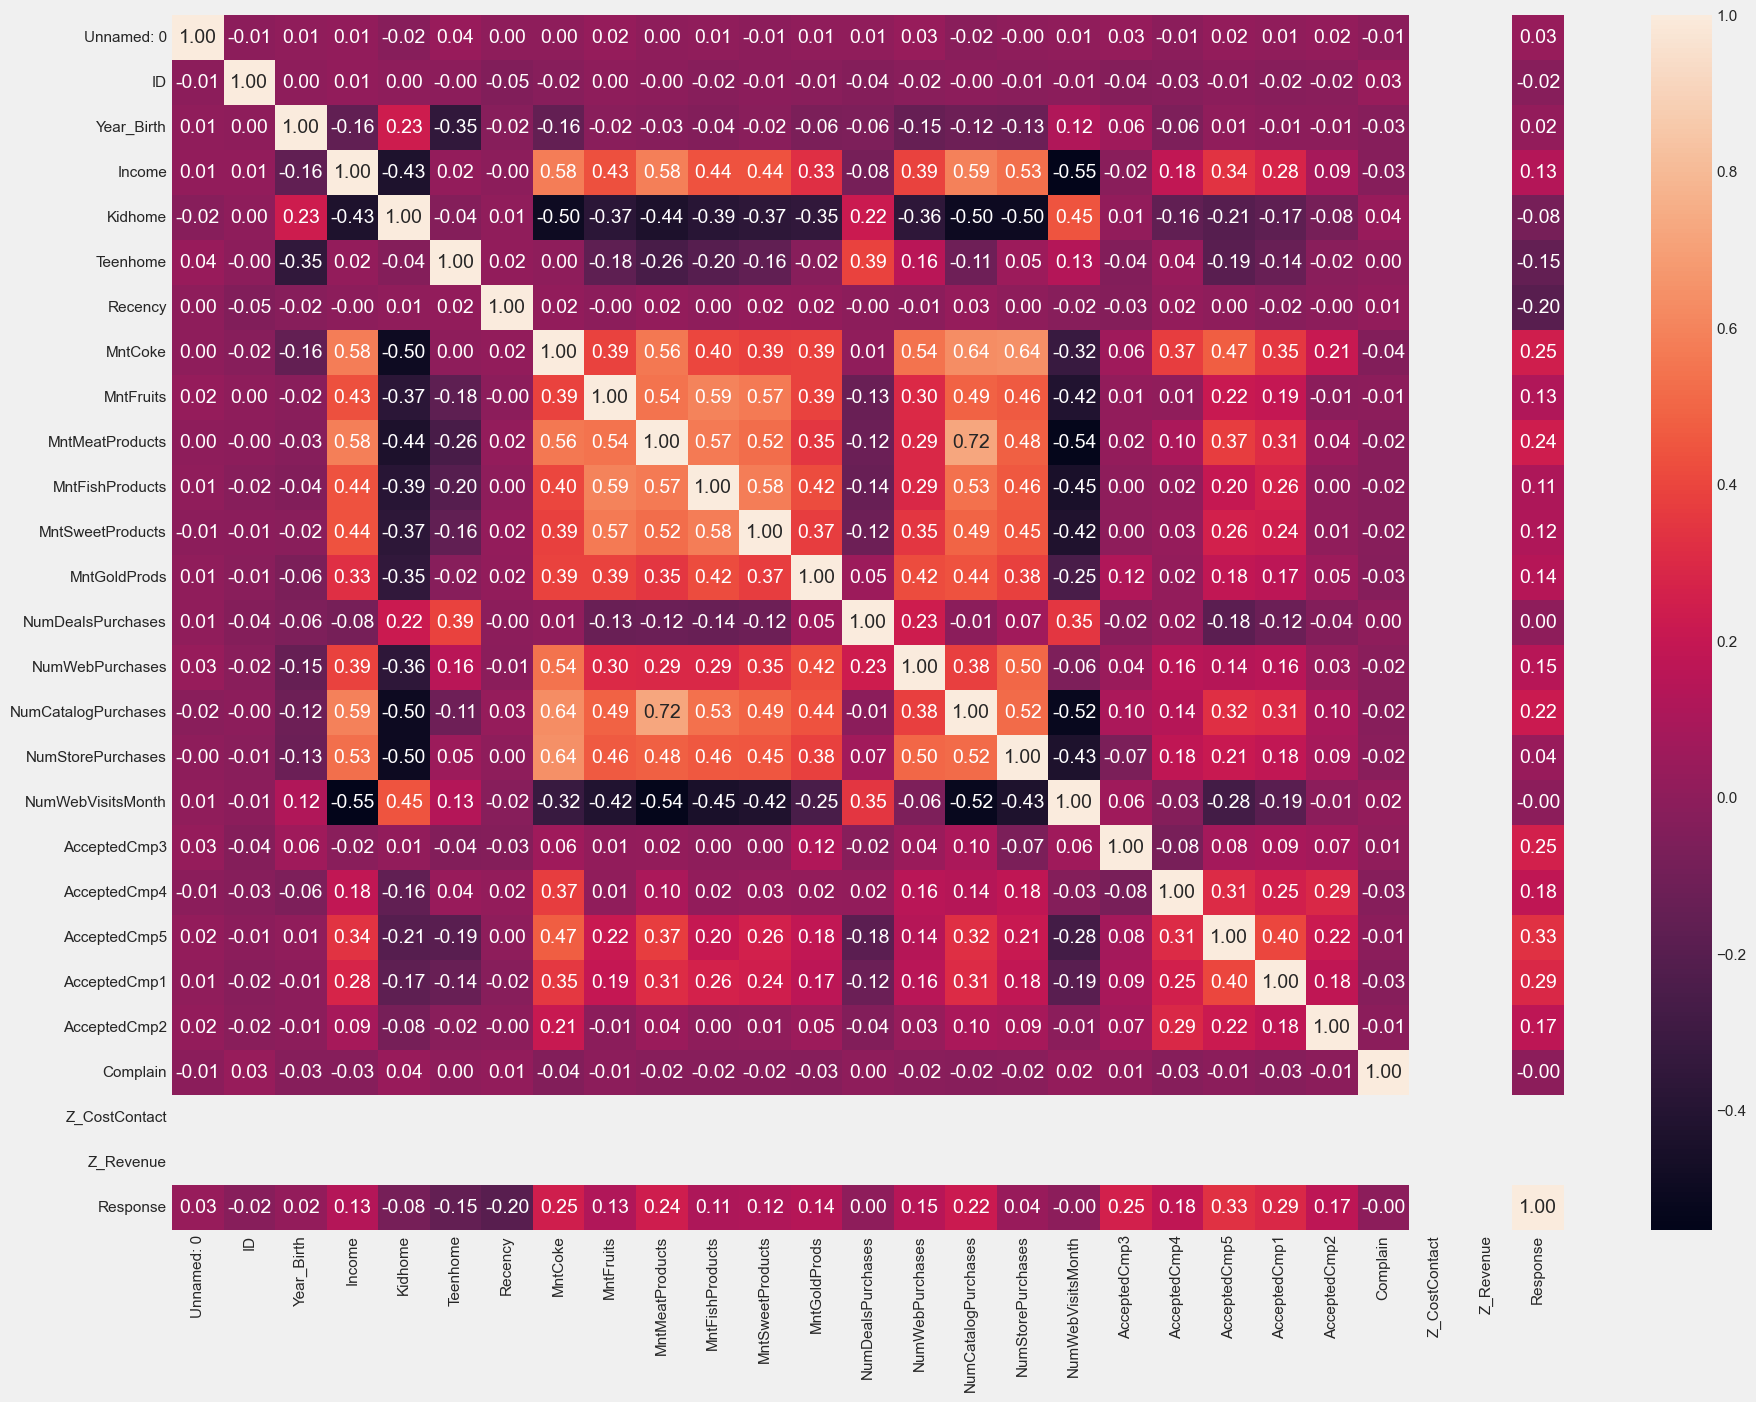

In [57]:
# analisi menggunakan heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df[num].corr(), annot=True, fmt='.2f')
plt.grid(False)

Berdasarkan hasil grafik diatas :
1. Dataset memiliki 30 fitur dan 2240 data
2. Terdapat Misiing value pada data income
3. TIdak terdapat data duplikat
4. Secara keseluruhan data memiliki outlier, dan terdapat nilai ekstrim pada fitur data year_birth dan income. 

# Data Preprocessing

## Handling Outlier

In [62]:
df_new = df.copy()

In [63]:
df_new.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [64]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_new)}')

# Array boolean untuk menandai entri yang lolos filter
filtered_entries = np.array([True] * len(df_new))

# Loop untuk setiap kolom yang ingin difilter berdasarkan IQR
for col in ['Year_Birth','Income', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases' ]:
    Q1 = df_new[col].quantile(0.25)
    Q3 = df_new[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    # Update array boolean untuk tetap True jika berada di dalam batas IQR
    filtered_entries = ((df_new[col] >= low_limit) & (df_new[col] <= high_limit)) & filtered_entries
    
# Membuat DataFrame baru yang sudah difilter
df1_new = df_new[filtered_entries]

# Menampilkan jumlah baris setelah filter
print(f'Jumlah baris setelah memfilter outlier: {len(df1_new)}')

Jumlah baris sebelum memfilter outlier: 2240
Jumlah baris setelah memfilter outlier: 1840


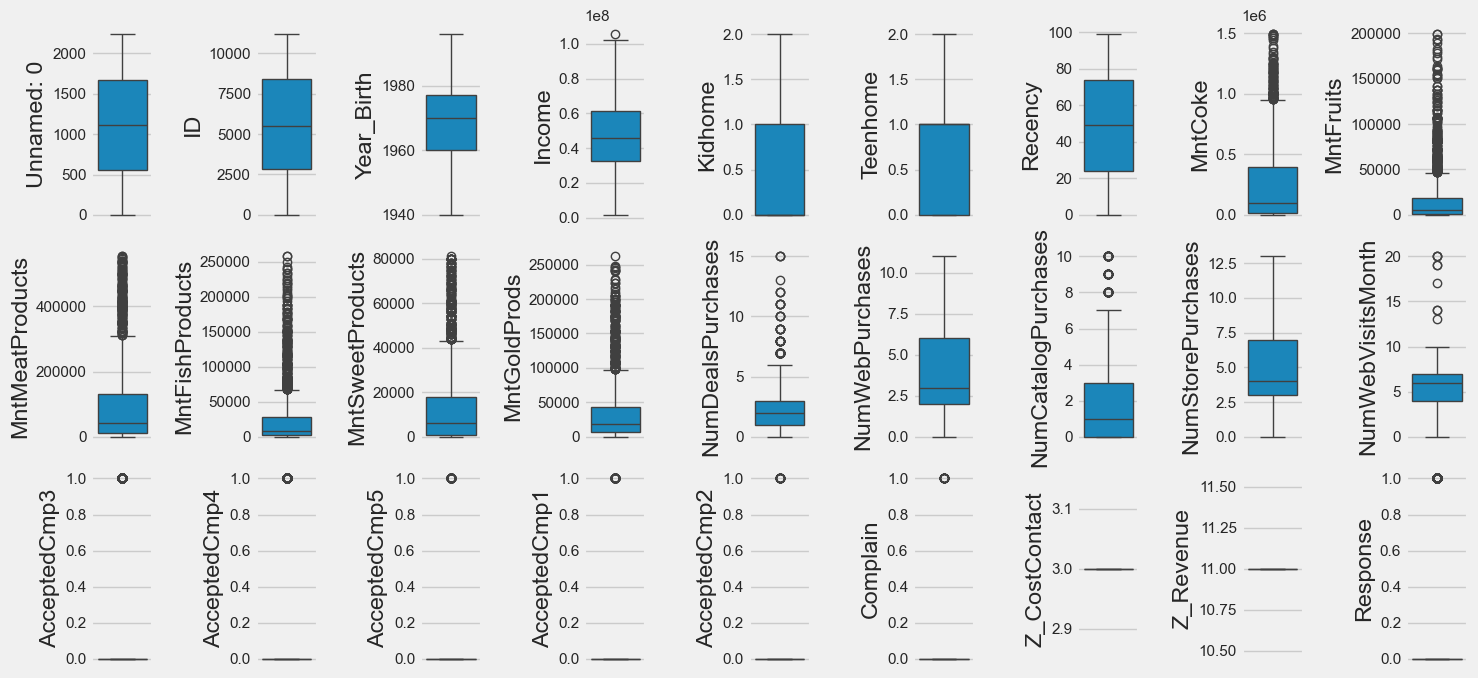

In [65]:
num = df1_new.loc[:, (df1_new.dtypes == 'int64') | (df1_new.dtypes == 'float64')].columns.tolist()
plt.figure(figsize=(15, 7))
for i in range(0, len(num)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df1_new[num[i]], orient='v')
    plt.tight_layout()

## Handling Missing Value  

In [67]:
#f1_new['Income'] = df1_new['Income'].fillna(df1_new['Income'].median())
df1_new = df1_new.dropna(subset=['Income'])

In [68]:
df1_new.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Feature Engineering

### Age of Customer

In [76]:
# Ekstraksi umur dengan mengurangkan Year_Birth dari tahun 2024
df1_new['Age'] = 2024 - df1_new['Year_Birth']

#Membuat 4 kategori umur menggunakan kondisi loc
df1_new.loc[(df1_new['Age'] >= 0) & (df1_new['Age'] < 17), 'Age_Category'] = "Child"
df1_new.loc[(df1_new['Age'] >= 17) & (df1_new['Age'] < 30), 'Age_Category'] = "Young Adult"
df1_new.loc[(df1_new['Age'] >= 30) & (df1_new['Age'] < 55), 'Age_Category'] = "Middle Aged Adult"
df1_new.loc[(df1_new['Age'] >= 55), 'Age_Category'] = "Older Adult"

# Menampilkan hasil
print(df1_new[['Age', 'Age_Category']])

      Age       Age_Category
1      70        Older Adult
2      59        Older Adult
3      40  Middle Aged Adult
4      43  Middle Aged Adult
5      57        Older Adult
...   ...                ...
2234   50  Middle Aged Adult
2236   78        Older Adult
2237   43  Middle Aged Adult
2238   68        Older Adult
2239   70        Older Adult

[1840 rows x 2 columns]


### Durasi Membership 

In [78]:
# Pastikan kolom Dt_Customer dalam format datetime dengan format yang benar
df1_new['Dt_Customer'] = pd.to_datetime(df1_new['Dt_Customer'], format='%d-%m-%Y')

# Hitung lama membership dalam tahun
df1_new['Membership_Years'] = 2024 - df1_new['Dt_Customer'].dt.year

# Menampilkan beberapa baris pertama untuk melihat hasil
print(df1_new[['Dt_Customer', 'Membership_Years']].head())

  Dt_Customer  Membership_Years
1  2014-03-08                10
2  2013-08-21                11
3  2014-02-10                10
4  2014-01-19                10
5  2013-09-09                11


### Jumlah Anak

In [80]:
df1_new['Jumlah_anak'] = df1_new['Kidhome'] + df1_new['Teenhome']
df1_new['Jumlah_anak'].value_counts()

Jumlah_anak
1    1027
2     405
0     359
3      49
Name: count, dtype: int64

### Total Pengeluaran

In [82]:
df1_new['Total_pengeluaran'] = df1_new['MntCoke'] + df1_new['MntFruits'] + df1_new['MntMeatProducts'] + df1_new['MntFishProducts'] + df1_new['MntSweetProducts'] + df1_new['MntGoldProds'] 
df1_new['Total_pengeluaran'].value_counts().head()

Total_pengeluaran
46000    18
22000    17
57000    16
44000    15
55000    15
Name: count, dtype: int64

### Total Transaksi

In [84]:
df1_new['Total_transaksi'] = df1_new['NumDealsPurchases'] + df1_new['NumWebPurchases'] + df1_new['NumCatalogPurchases'] + df1_new['NumStorePurchases'] 
df1_new['Total_transaksi'].value_counts().head()

Total_transaksi
7    148
5    143
4    124
6    122
9    100
Name: count, dtype: int64

### Total Campaign

In [86]:
df1_new['Total_campaign'] = df1_new['AcceptedCmp3'] + df1_new['AcceptedCmp4'] + df1_new['AcceptedCmp5'] + df1_new['AcceptedCmp1'] + df1_new['AcceptedCmp2'] 
df1_new['Total_campaign'].value_counts().head()

Total_campaign
0    1520
1     245
2      53
3      15
4       7
Name: count, dtype: int64

### Conversion Rate

In [88]:
def cvr(x,y):
    if y == 0:
        return 0
    return x / y

df1_new['CVR'] = round(df1_new.apply(lambda x: cvr(x['Total_transaksi'],x['NumWebVisitsMonth']), axis=1), 2)
df1_new['CVR'].value_counts().head()

CVR
1.00    120
2.00     61
0.71     42
4.00     42
3.00     42
Name: count, dtype: int64

In [89]:
df1_new

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Category,Membership_Years,Jumlah_anak,Total_pengeluaran,Total_transaksi,Total_campaign,CVR
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70,Older Adult,10,2,27000,6,0,1.20
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59,Older Adult,11,0,776000,21,0,5.25
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40,Middle Aged Adult,10,1,53000,8,0,1.33
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,43,Middle Aged Adult,10,1,422000,19,0,3.80
5,5,7446,1967,S2,Bertunangan,62513000.0,0,1,2013-09-09,16,520000,42000,98000,0,42000,14000,2,6,4,10,6,0,0,0,0,0,0,3,11,0,57,Older Adult,11,1,716000,22,0,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,2234,8372,1974,S1,Menikah,34421000.0,1,0,2013-07-01,81,3000,3000,7000,6000,2000,9000,1,1,0,2,7,0,0,0,0,0,0,3,11,0,50,Middle Aged Adult,11,1,30000,4,0,0.57
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,78,Older Adult,10,3,444000,22,1,3.14
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,43,Middle Aged Adult,10,0,1241000,19,1,3.17
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,68,Older Adult,10,1,843000,23,0,7.67


In [90]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1840 entries, 1 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1840 non-null   int64         
 1   ID                   1840 non-null   int64         
 2   Year_Birth           1840 non-null   int64         
 3   Education            1840 non-null   object        
 4   Marital_Status       1840 non-null   object        
 5   Income               1840 non-null   float64       
 6   Kidhome              1840 non-null   int64         
 7   Teenhome             1840 non-null   int64         
 8   Dt_Customer          1840 non-null   datetime64[ns]
 9   Recency              1840 non-null   int64         
 10  MntCoke              1840 non-null   int64         
 11  MntFruits            1840 non-null   int64         
 12  MntMeatProducts      1840 non-null   int64         
 13  MntFishProducts      1840 non-null   i

# Explorasi Data Analysis (EDA)

In [92]:
df2 = df1_new.copy()

In [93]:
nums = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
      'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Membership_Years', 'Jumlah_anak', 'Total_pengeluaran', 'Total_transaksi', 'Total_campaign']
cats = ['Education', 'Marital_Status', 'Age_Category']


### Pendekatan Numerik

In [95]:
fitur = [ 'Income', 'Recency', 'Age', 'Membership_Years', 'Jumlah_anak', 'Total_pengeluaran', 'Total_transaksi', 'Total_campaign', 'CVR']

In [96]:
df2[fitur].describe().round(2)

,Income,Recency,Age,Membership_Years,Jumlah_anak,Total_pengeluaran,Total_transaksi,Total_campaign,CVR
count,1.840000e+03,1840.00,1840.00,1840.00,1840.00,1840.00,1840.00,1840.00,1840.00
mean,4.694591e+07,48.55,54.98,10.96,1.08,441633.15,13.58,0.23,3.29
std,1.866545e+07,28.91,11.48,0.68,0.72,478203.10,7.42,0.57,3.66
min,1.730000e+06,0.00,28.00,10.00,0.00,5000.00,0.00,0.00,0.00
25%,3.289200e+07,24.00,47.00,10.00,1.00,57000.00,7.00,0.00,1.12
50%,4.601450e+07,49.00,54.00,11.00,1.00,231500.00,12.00,0.00,2.00
75%,6.129725e+07,74.00,64.00,11.00,1.00,735250.00,20.00,0.00,4.00
max,1.054710e+08,99.00,84.00,12.00,3.00,2231000.00,35.00,4.00,27.00


In [97]:
df2[cats].describe()

,Education,Marital_Status,Age_Category
count,1840,1840,1840
unique,5,6,3
top,S1,Menikah,Middle Aged Adult
freq,904,718,957


Berdasarkan Table Numerikal : <br>
    1. Rata-rata pelanggan memiliki income Rp 47.000.000/tahun <br>
    2. Rata-rata pelanggan berbelanja sekitar 2 bulan sekali <br>
    3. Rata-rata pelanggan berumur 50 tahun <br>
    4. Rata-rata pelanggan telah menjadi member selama 10 tahun <br>
    5. Rata-rata pelanggan memiliki satu anak <br>
    6. Rata-rata pelanggan berbelanja dengan total pengeluaran Rp 690.000 <br>
    7. Rata-rata pelanggan melakukan 13 transaksi <br>
    8. Rata-rata pelanggan tidak menerima campaign <br>
    9. Rata-rata konversi kunjungan web terhadap pembelian hanya sebesar 3.29% <br>
    <br>
Berdasarkal Tabel Kategori : <br>
    Rata-rata pelanggan berlatar pendidikan S1, Menikah dan di rentag uasia Middle age. 

### Univariate Analisis 

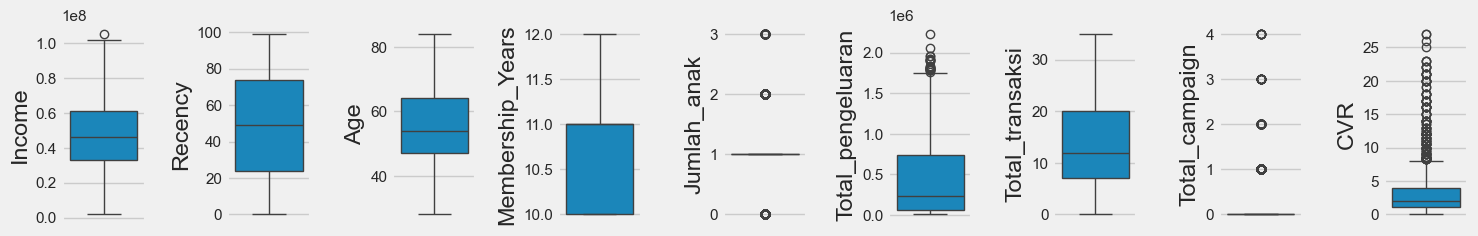

In [100]:
plt.figure(figsize=(15, 7))
for i in range(0, len(fitur)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df2[fitur[i]], orient='v')
    plt.tight_layout()

Distribusi data dari fitur numerikal diatas hanya sedikit yang memiliki outlier. 

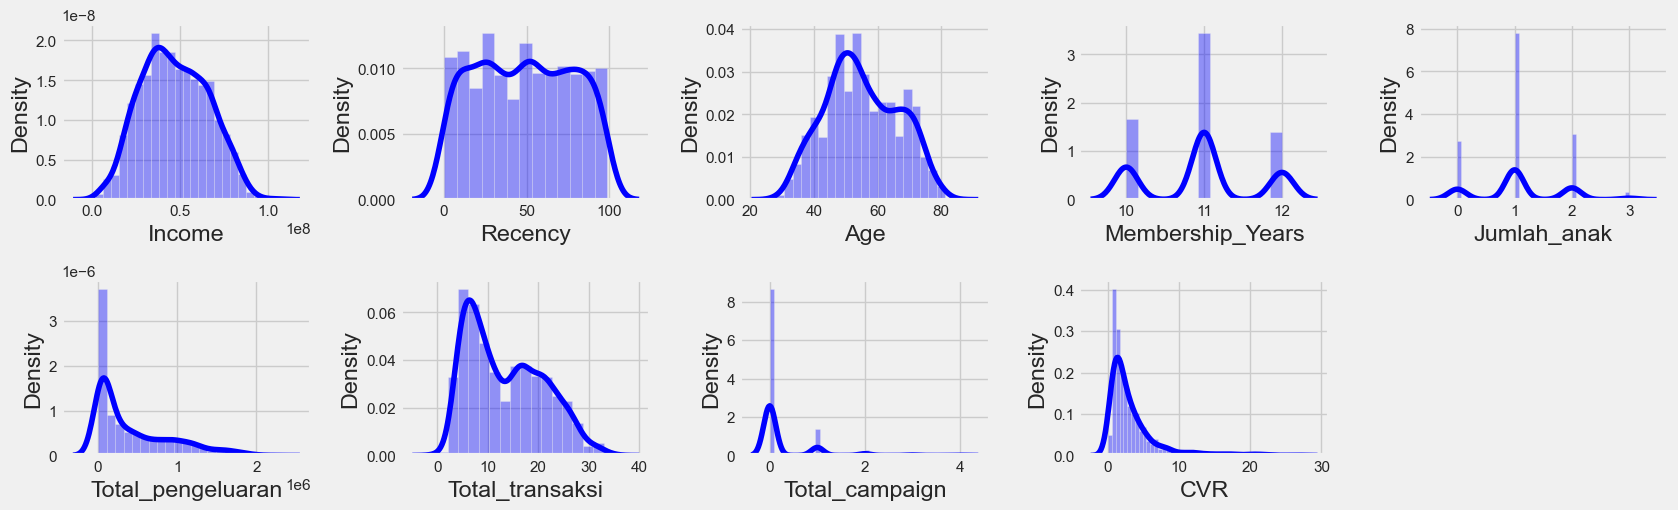

In [102]:
plt.figure(figsize=(17, 10))
for i in range(0, len(fitur)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df2[fitur[i]], color = 'blue')
    plt.tight_layout()
plt.show()

- Distribusi fitur income, recency, dan Age cenderung mendekati normal.
- Distribusi Total_pengeluaran, Total_transaksi dan CVR cenderung Skewed positif. 
- Distribusi membership_years, Jumlah_anak, dan Total_campaign cenderung multimodal. 

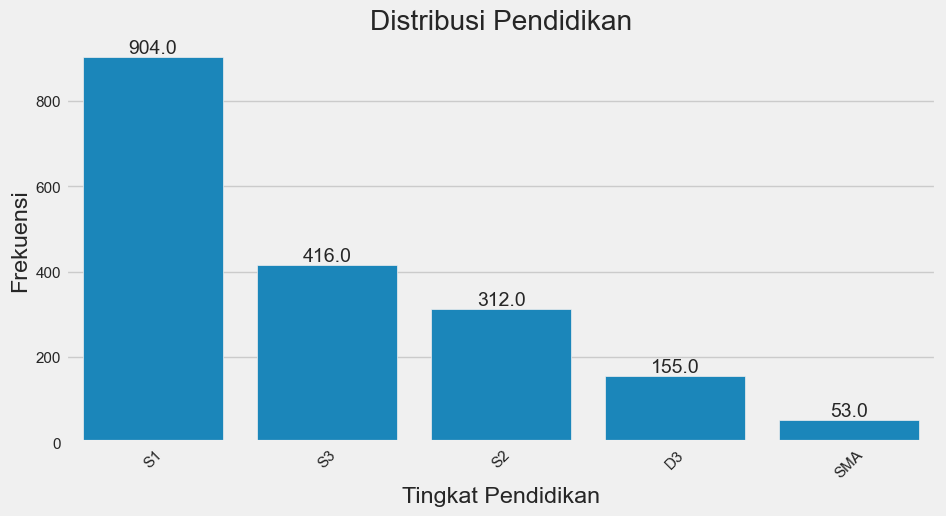

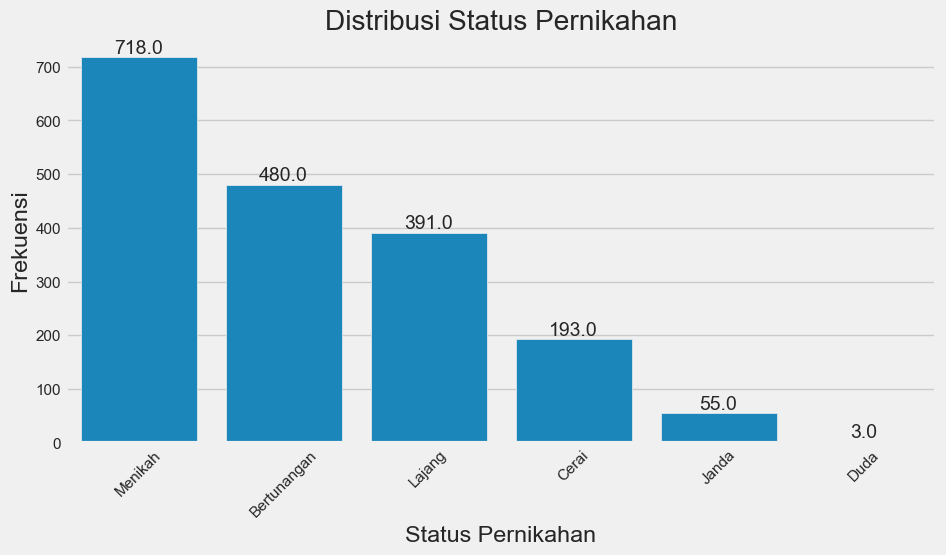

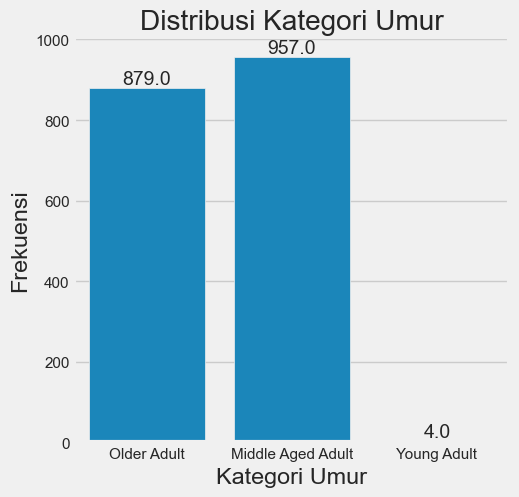

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Pendidikan
plt.figure(figsize=(10, 5))
sns.countplot(x='Education', data=df1_new, order=df1_new['Education'].value_counts().index)
plt.title('Distribusi Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)

# Tambahkan jumlah di atas grafik
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

plt.show()

# Visualisasi Status Pernikahan
plt.figure(figsize=(10, 5))
sns.countplot(x='Marital_Status', data=df1_new, order=df1_new['Marital_Status'].value_counts().index)
plt.title('Distribusi Status Pernikahan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)

# Tambahkan jumlah di atas grafik
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

plt.show()

# Visualisasi Kategori Umur
plt.figure(figsize=(5, 5))
sns.countplot(x='Age_Category', data=df1_new)
plt.title('Distribusi Kategori Umur')
plt.xlabel('Kategori Umur')
plt.ylabel('Frekuensi')

# Tambahkan jumlah di atas grafik
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

plt.show()

### Bivariate Analisis

#### Pengaruh Age, Income dan Total_pengeluaran terhadap CVR

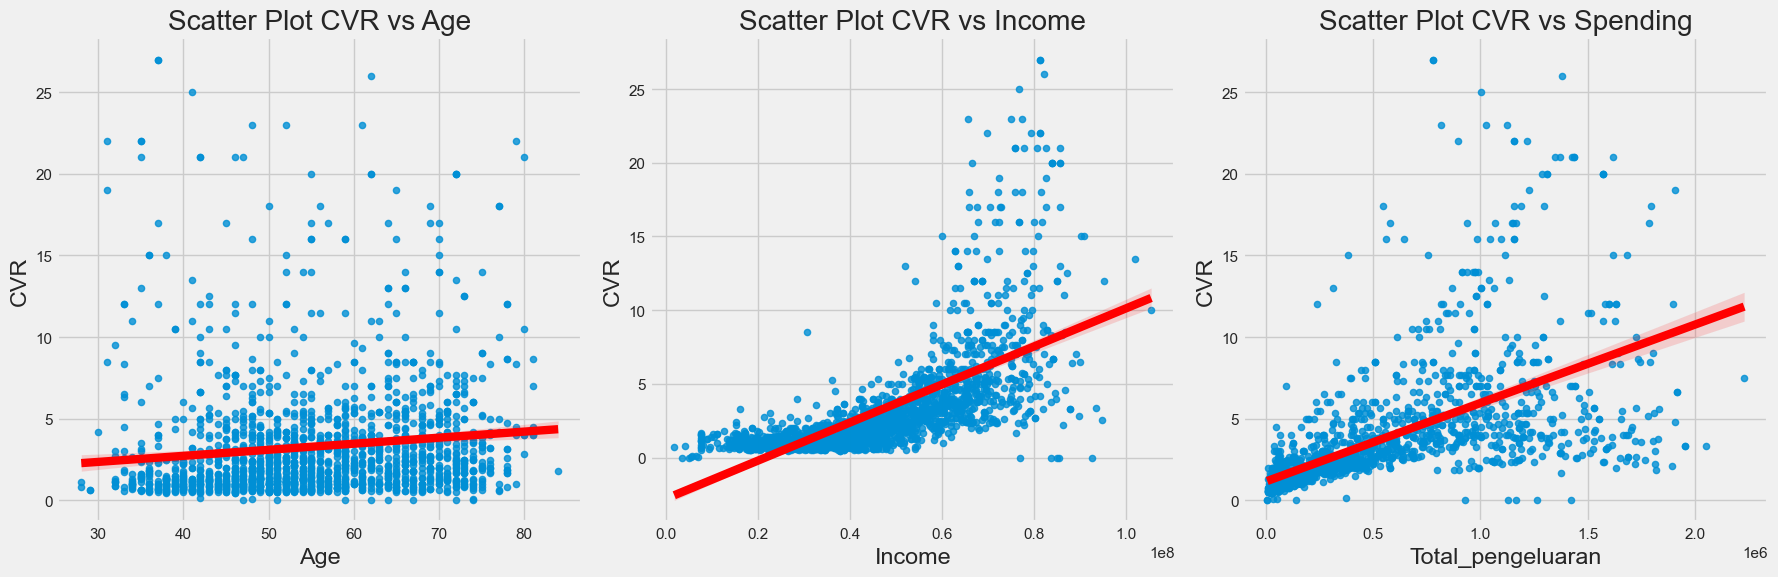

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure dan 3 subplot
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot dengan garis regresi CVR vs Age
sns.regplot(x='Age', y='CVR', data=df1_new, ax=ax[0], scatter_kws={'s': 20}, line_kws={'color': 'red'})
ax[0].set_title('Scatter Plot CVR vs Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('CVR')

# Scatter plot dengan garis regresi CVR vs Income
sns.regplot(x='Income', y='CVR', data=df1_new, ax=ax[1], scatter_kws={'s': 20}, line_kws={'color': 'red'})
ax[1].set_title('Scatter Plot CVR vs Income')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('CVR')

# Scatter plot dengan garis regresi CVR vs Spending
sns.regplot(x='Total_pengeluaran', y='CVR', data=df1_new, ax=ax[2], scatter_kws={'s': 20}, line_kws={'color': 'red'})
ax[2].set_title('Scatter Plot CVR vs Spending')
ax[2].set_xlabel('Total_pengeluaran')
ax[2].set_ylabel('CVR')

# Tampilkan plot
plt.tight_layout()
plt.show()

Dari hasil diatas :
    1. Secara keseluruhan income/pendapatan dan total_pengeluaran berkorelasi positif terhadap konversi pembelian. <br>
    2. Hal ini menunjukkan bahwa semakin tinggi pendapatan dan total_pengeluaran, maka kemungkinan atau pembelian dari pelanggan akan meningkat. <br>
    3. Pelanggan dengan pengeluaran tinggi cenderung memiliki tingkat konversi yang lebih baik, menunjukkan bahwa mereka mungkin lebih loyal atau cenderung membeli lebih banyak. Selain itu, pendapatan yang lebih tinggi juga berkorelasi positif dengan konversi, sehingga penargetan pelanggan berpendapatan tinggi dengan penawaran premium atau eksklusif bisa menjadi strategi pemasaran yang efektif. <br>
    4. Meskipun ada asumsi bahwa kelompok usia tertentu lebih cenderung melakukan pembelian, hasil ini menunjukkan bahwa faktor lain, seperti gaya hidup, mungkin lebih berpengaruh daripada usia dalam mempengaruhi konversi.


#### Pengaruh Age terhadap Income dan Total_pengeluaran

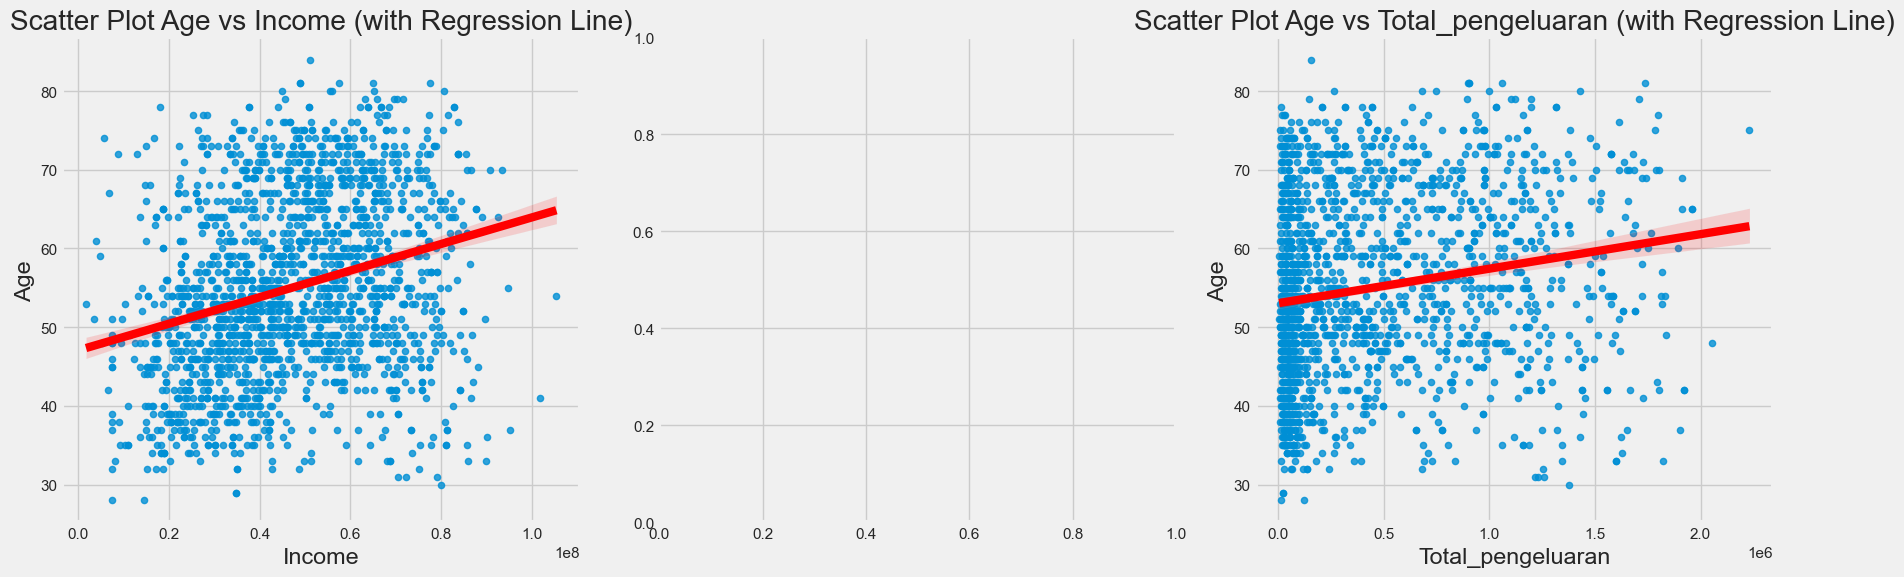

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure dan 3 subplot
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot dengan garis regresi CVR vs Age
sns.regplot(x='Income', y='Age', data=df1_new, ax=ax[0], scatter_kws={'s': 20}, line_kws={'color': 'red'})
ax[0].set_title('Scatter Plot Age vs Income (with Regression Line)')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Age')

# Scatter plot dengan garis regresi CVR vs Spending
sns.regplot(x='Total_pengeluaran', y='Age', data=df1_new, ax=ax[2], scatter_kws={'s': 20}, line_kws={'color': 'red'})
ax[2].set_title('Scatter Plot Age vs Total_pengeluaran (with Regression Line)')
ax[2].set_xlabel('Total_pengeluaran')
ax[2].set_ylabel('Age')

# Tampilkan plot
plt.tight_layout()
plt.show()

Secara keseluruhan fitur Age terhadap income dan Total_pengeluaran berkorelasi positif namun sangat lemah sekali. Ini menunjukkan bahwa usia bukanlah faktor utama yang mempengaruhi pendapatan atau tingkat pengeluaran pelanggan. Dengan demikian, strategi pemasaran yang terlalu berfokus pada usia mungkin kurang efektif, dan lebih baik diarahkan pada faktor lain seperti perilaku belanja atau segmen pendapatan untuk meningkatkan konversi dan penjualan.

#### Pengaruh Income terhadap Total_pengeluaran

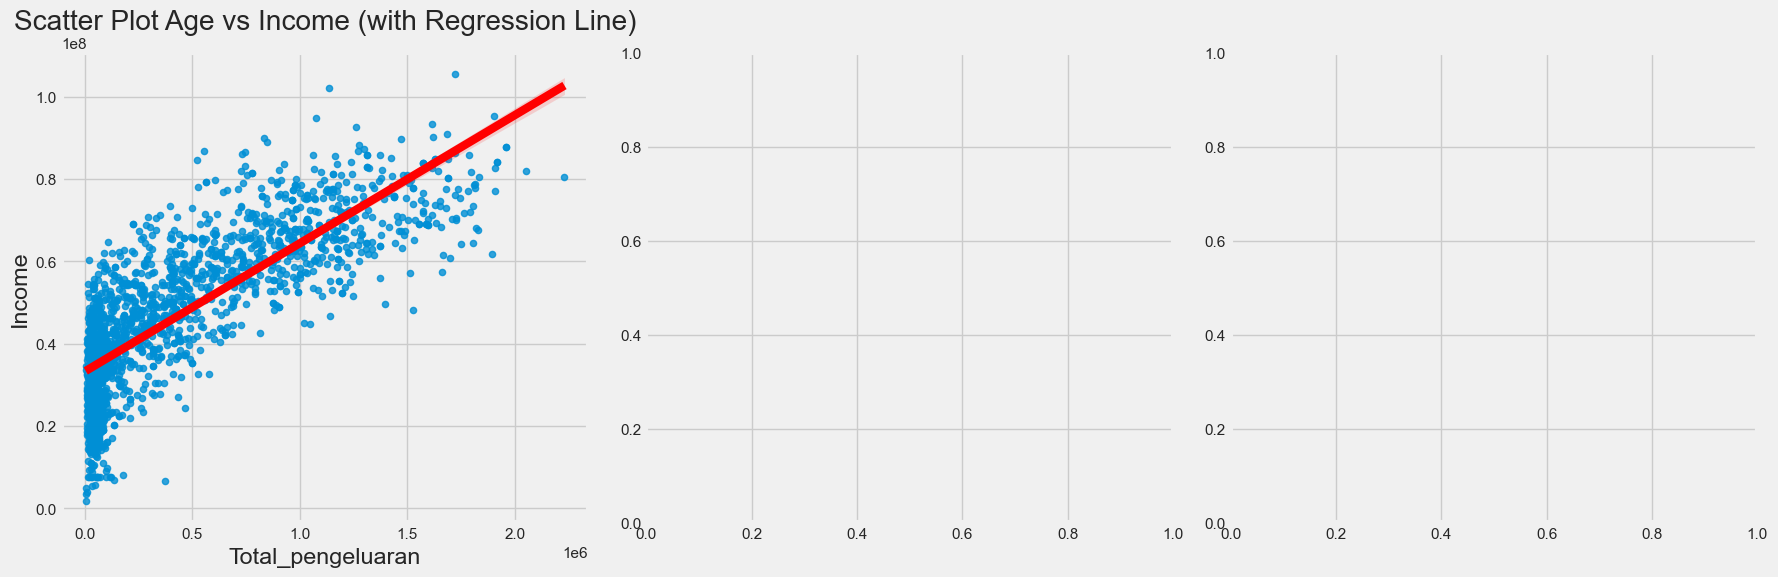

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure dan 3 subplot
fig, ax = plt.subplots(1, 3, figsize=(18, 6))


sns.regplot(x='Total_pengeluaran', y='Income', data=df1_new, ax=ax[0], scatter_kws={'s': 20}, line_kws={'color': 'red'})
ax[0].set_title('Scatter Plot Age vs Income (with Regression Line)')
ax[0].set_xlabel('Total_pengeluaran')
ax[0].set_ylabel('Income')



# Tampilkan plot
plt.tight_layout()
plt.show()

1. Income memiliki korelasi positif yang kuat dengan Total_pengeluaran <br>
2. Menunjukkan bahwa semakin tinggi pendapatan seseorang, semakin besar pula kemungkinannya untuk membelanjakan lebih banyak. Ini mengindikasikan bahwa pelanggan dengan pendapatan lebih tinggi cenderung memiliki daya beli yang lebih besar, sehingga mereka lebih mungkin untuk melakukan pembelian yang lebih banyak atau lebih mahal. Hal ini dapat digunakan untuk menargetkan segmen pelanggan dengan pendapatan tinggi melalui penawaran premium atau strategi upselling, guna meningkatkan total pengeluaran mereka dan, pada akhirnya, konversi penjualan.


### Multivariate Analisis

<Axes: >

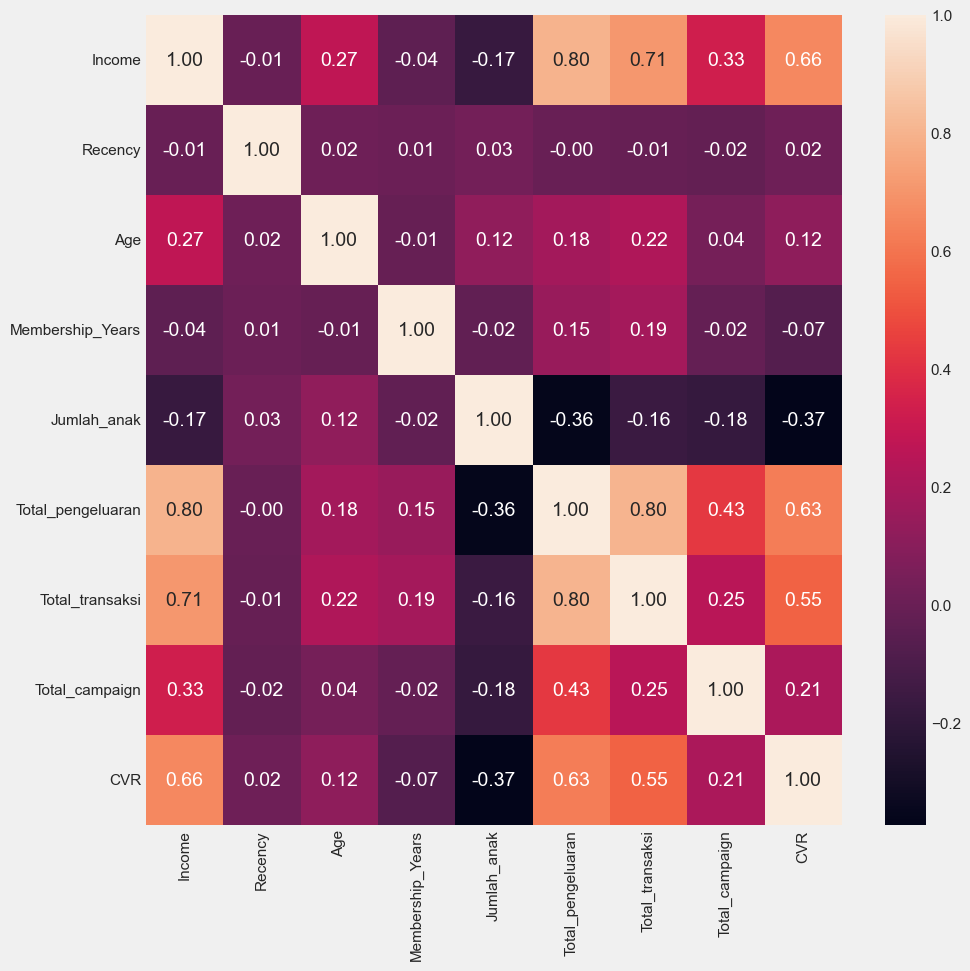

In [118]:
# analisi menggunakan heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df2[fitur].corr(), annot=True, fmt='.2f')

Hasil analisis menggunakan korelasi hatmap didapati fitur Income, Total_pengeluaran dan Total_transaksi memiliki korelasi yang tinggi terhadap fitur target CVR. 

# Data Preprocessing

### Feature Encoding

In [140]:
# Mapping yang sudah ditentukan
mapping_education = {
    'SMA': 0,
    'D3': 1,
    'S1': 2,
    'S2': 3,
    'S3': 4
}

# Lakukan label encoding dengan mapping di atas
df2['Education_encode'] = df2['Education'].replace(mapping_education)

# Cek hasilnya
print(df2[['Education', 'Education_encode']].head())

  Education  Education_encode
1        S1                 2
2        S1                 2
3        S1                 2
4        S3                 4
5        S2                 3


In [141]:
df3 = df2.copy()

In [142]:
df3.head(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Category,Membership_Years,Jumlah_anak,Total_pengeluaran,Total_transaksi,Total_campaign,CVR,Education_encode
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70,Older Adult,10,2,27000,6,0,1.20,2
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59,Older Adult,11,0,776000,21,0,5.25,2
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40,Middle Aged Adult,10,1,53000,8,0,1.33,2


In [143]:
X = df3.drop(columns=['Unnamed: 0',	'ID', 'Year_Birth',	'Education', 'Marital_Status', 'Dt_Customer', 'Age_Category']) 

In [144]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [145]:
X.head()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Membership_Years,Jumlah_anak,Total_pengeluaran,Total_transaksi,Total_campaign,CVR,Education_encode
0,-0.032256,0.876749,0.809803,-0.365148,-0.760019,-0.550891,-0.733803,-0.552627,-0.679909,-0.666071,-0.249485,-1.065265,-0.431682,-1.079751,-0.355372,-0.276863,-0.276863,-0.200339,-0.194394,-0.11496,-0.102146,0.0,0.0,-0.377964,1.308689,-1.400057,1.283647,-0.867301,-1.021472,-0.401435,-0.570350,-0.469878
1,1.321897,-0.950225,-1.022962,-0.780333,0.551282,1.078317,0.235689,2.018054,0.421110,0.119971,-0.788913,1.602558,-0.001869,1.526667,-0.802626,-0.276863,-0.276863,-0.200339,-0.194394,-0.11496,-0.102146,0.0,0.0,-0.377964,0.349991,0.061148,-1.501624,0.699405,1.000954,-0.401435,0.536465,-0.469878
2,-1.087862,0.876749,-1.022962,-0.780333,-0.760019,-0.449065,-0.621630,-0.363953,-0.569807,-0.687905,-0.249485,-0.684148,-0.861496,-0.428147,0.091881,-0.276863,-0.276863,-0.200339,-0.194394,-0.11496,-0.102146,0.0,0.0,-0.377964,-1.305942,-1.400057,-0.108989,-0.812916,-0.751815,-0.401435,-0.534823,-0.469878
3,0.608085,0.876749,-1.022962,1.572381,-0.248138,0.874666,0.163578,0.485079,0.751416,-0.469560,1.368798,0.459205,0.427945,0.223458,-0.355372,-0.276863,-0.276863,-0.200339,-0.194394,-0.11496,-0.102146,0.0,0.0,-0.377964,-1.044479,-1.400057,-0.108989,-0.041067,0.731298,-0.401435,0.140198,1.488391
4,0.834232,-0.950225,0.809803,-1.126321,0.848300,0.840724,0.003331,-0.599796,1.577180,-0.491395,-0.249485,0.840323,0.857758,1.526667,0.091881,-0.276863,-0.276863,-0.200339,-0.194394,-0.11496,-0.102146,0.0,0.0,-0.377964,0.175682,0.061148,-0.108989,0.573901,1.135783,-0.401435,0.104671,0.509256


# Modelling

In [148]:
df_model = X.copy()

### Principal Component Analysis

In [151]:
from sklearn.decomposition import PCA 

# fit pca
pca = PCA(n_components = 2)
pca.fit(df_model)

# pca transformed 
df_pca = pca.transform(df_model)

In [152]:
df_pca1 = pd.DataFrame(df_pca)

In [153]:
df_pca1

,0,1
0,-2.689352,0.270849
1,3.060593,-1.871533
2,-2.731833,-1.232687
3,0.687329,-0.550855
4,2.173034,0.275975
...,...,...
1835,-3.126193,-1.104863
1836,0.279178,4.589740
1837,3.193957,-0.473420
1838,3.579024,-0.590419


### Elbow Method

In [155]:
# mencari nilai k optimal dengan parameter inertia
from sklearn.cluster import KMeans

inertia = []
k_values = range(2,11)

# fit model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_pca1)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

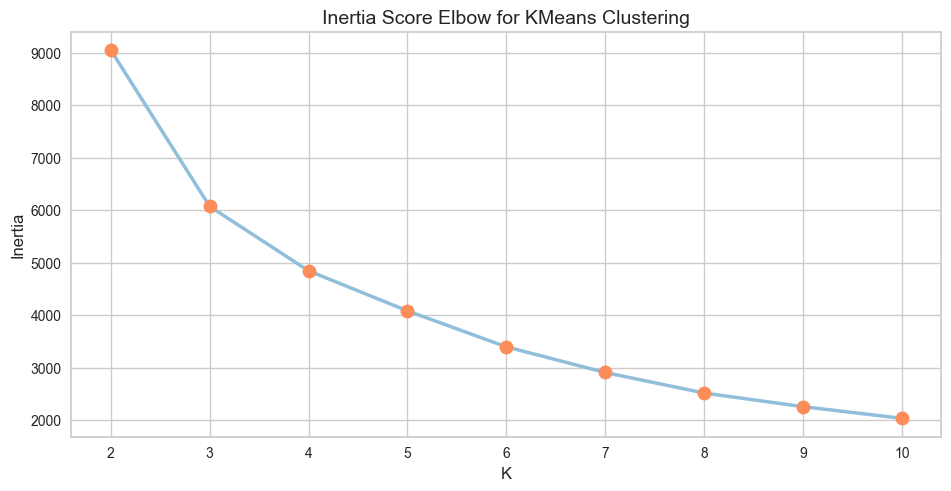

In [156]:
# Visualisasi grafik elbow method
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10, 5))

# plot grafik
plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#fc8d59', markersize=10)
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=14)
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

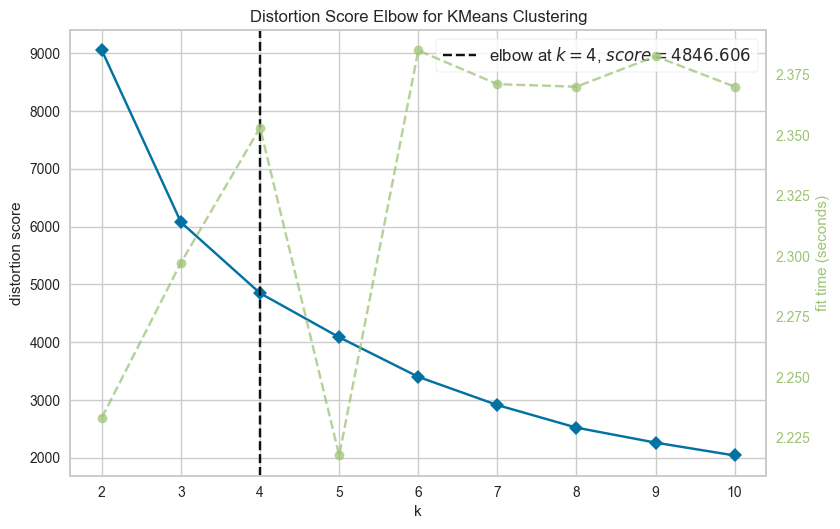

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [157]:
# visualisasi dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_pca1)       
visualizer.show() 

### K-Means Clustering

In [159]:
from sklearn.cluster import KMeans

# fit model
kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(df_pca1.values)
df_pca1['cluster'] = kmeans.labels_

In [160]:
df_pca1.sample(10)

,0,1,cluster
166,-2.258238,-0.535615,1
766,-1.867886,-2.104892,1
1764,-2.291532,2.123103,1
1025,-1.779836,1.149677,1
913,1.574475,0.265551,3
113,-3.315050,-1.159430,1
1222,3.731058,-0.082105,0
67,-2.862251,0.463709,1
492,2.138130,-2.812934,2
765,4.193225,-2.364468,2


Text(0.5, 1.0, 'Cluster Segmentation')

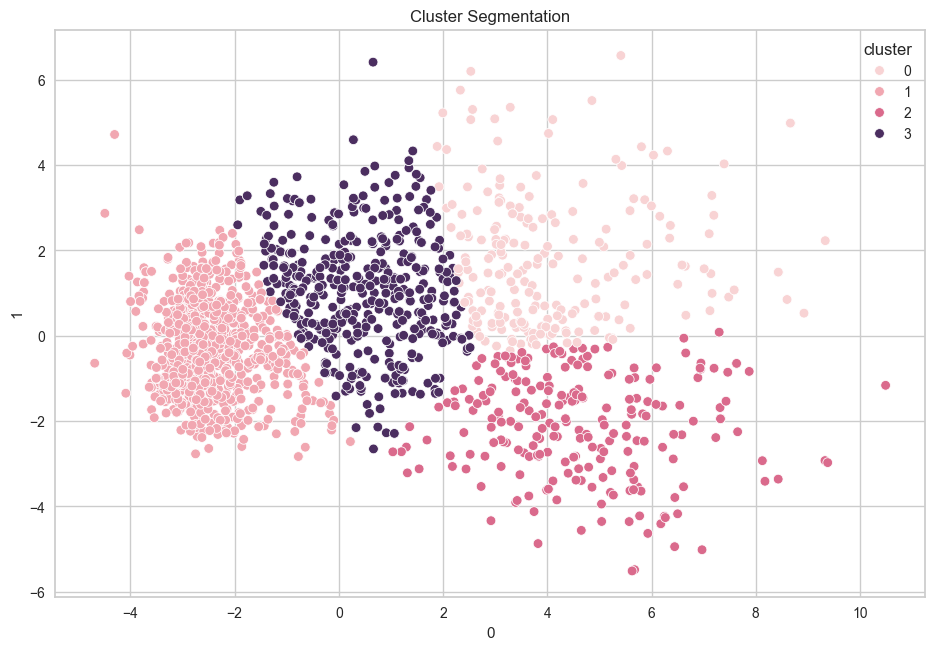

In [161]:
pastel_colors = ['#F8D3D4', '#F1A7B1', '#DA6A8C', '#4B2E60']

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=df_pca1, x=0, y=1, hue='cluster', palette=pastel_colors)
plt.title('Cluster Segmentation')

### Evaluasi Silhouette Score

In [163]:
#### Konversi nama kolom menjadi string
df_pca1.columns = df_pca1.columns.astype(str)

# Lakukan clustering dengan KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Contoh clustering dengan KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_pca1)

# Menghitung Silhouette Score
score = silhouette_score(df_pca1, clusters)

print(f"Silhouette Score: {score}")

Silhouette Score: 0.5353843368234046


Average silhouette score for 4 clusters: 0.5353843368234046


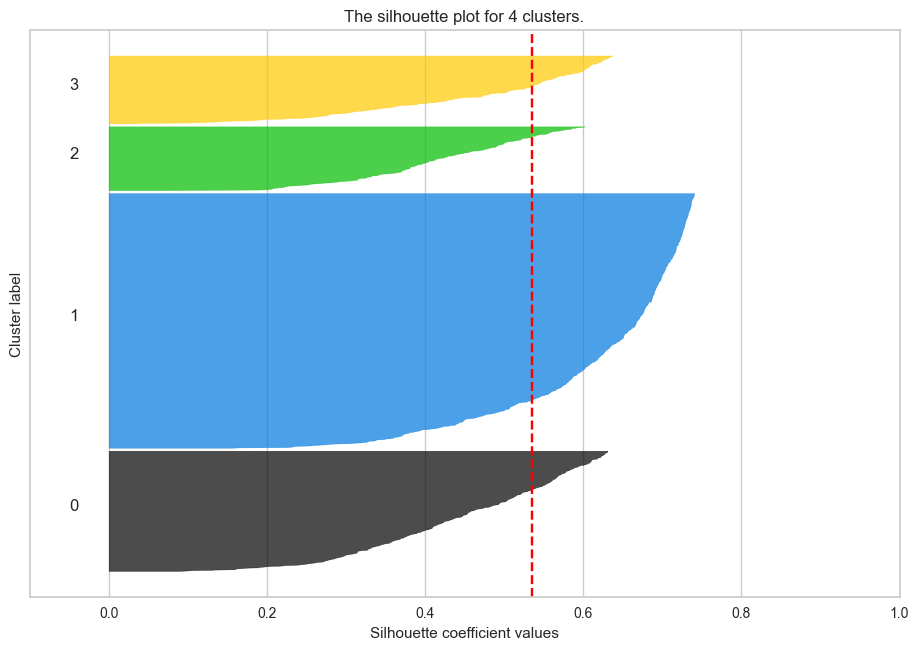

In [164]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def visualize_silhouette_layer(data, n_clusters):
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    
    # KMeans Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    
    # Silhouette Score
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(f"Average silhouette score for {n_clusters} clusters: {silhouette_avg}")
    
    # Silhouette samples
    sample_silhouette_values = silhouette_samples(data, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"The silhouette plot for {n_clusters} clusters.")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])

    plt.show()

# Visualisasi untuk 3 cluster misalnya
visualize_silhouette_layer(df_pca1, n_clusters=4)

In [165]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=123)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='coolwarm')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

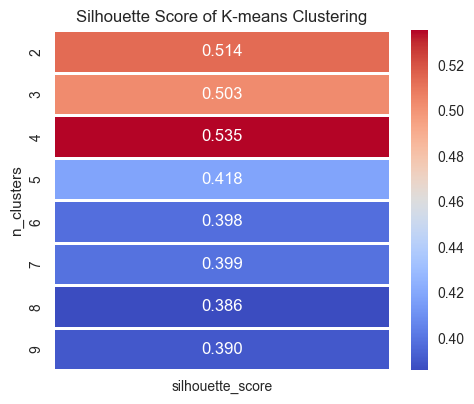

In [167]:
visualize_silhouette_layer(df_pca1)

### Analisis Clustering

In [169]:
df3['Cluster'] = kmeans.labels_

In [171]:
df3.sample(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Category,Membership_Years,Jumlah_anak,Total_pengeluaran,Total_transaksi,Total_campaign,CVR,Education_encode,Cluster
1463,1463,10403,1978,S1,Bertunangan,16531000.0,1,0,2014-06-18,43,2000,13000,6000,7000,5000,11000,3,3,0,3,7,0,0,0,0,0,0,3,11,0,46,Middle Aged Adult,10,1,44000,9,0,1.29,2,1
1033,1033,5263,1977,D3,Menikah,31056000.0,1,0,2013-01-22,99,5000,10000,13000,3000,8000,16000,1,1,0,3,8,0,0,0,0,0,0,3,11,0,47,Middle Aged Adult,11,1,55000,5,0,0.62,1,1
1076,1076,4207,1981,S3,Menikah,87171000.0,0,0,2013-05-01,27,1001000,44000,107000,58000,44000,44000,1,6,7,11,2,1,0,1,0,0,0,3,11,0,43,Middle Aged Adult,11,0,1298000,25,2,12.50,4,3


In [172]:
feats = ['Income', 'Recency', 'Total_pengeluaran', 'Total_transaksi', 'Total_campaign', 'Age', 'CVR', 'Cluster']

In [173]:
df_analisis = df3[feats]

In [174]:
df_result = df_analisis.groupby('Cluster').agg(['median', 'mean']).round(2)
display(df_result)

Income              Recency        Total_pengeluaran              \
             median         mean  median   mean            median        mean   
Cluster                                                                         
0        52597000.0  52619320.37    48.0  47.28          434000.0   464853.55   
1        33297500.0  33052306.28    49.0  49.29           58000.0    78625.54   
2        65215000.0  66546961.21    49.0  48.91         1116000.0  1166030.17   
3        71488000.0  70472113.36    49.0  47.70         1040000.0  1078117.41   

        Total_transaksi        Total_campaign          Age           CVR        
                 median   mean         median  mean median   mean median  mean  
Cluster                                                                         
0                  17.0  17.54            0.0  0.20   59.0  58.47   2.86  3.24  
1                   7.0   7.35            0.0  0.06   51.0  51.89   1.12  1.25  
2                  25.0  23.96            1.0  0.89   60.5  60.14   4.33  4.87  
3                  20.0  20.11            0.0  0.28   55.0  55.56   8.00  9.49

In [175]:
map_cluster = {
    0 : 'Low Spender',
    1 : 'Risk of Churn',
    2 : 'High Spender',
    3 : 'Mid Spender'
}

df_analisis['map_cluster'] = df_analisis['Cluster'].map(map_cluster)

([0, 1, 2, 3],
 [Text(0, 0, 'Risk of Churn'),
  Text(1, 0, 'Mid Spender'),
  Text(2, 0, 'Low Spender'),
  Text(3, 0, 'High Spender')])

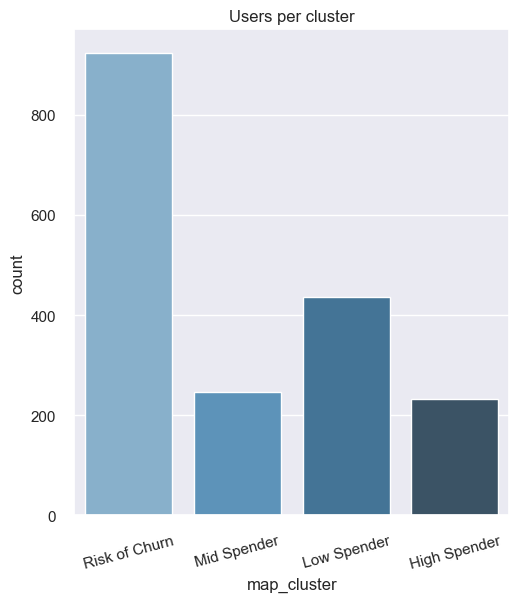

In [176]:
sns.set(rc={'figure.figsize':(5,6)})
sns.countplot(x=df_analisis['map_cluster'], palette='Blues_d')
plt.title('Users per cluster')
plt.xticks(rotation=15)

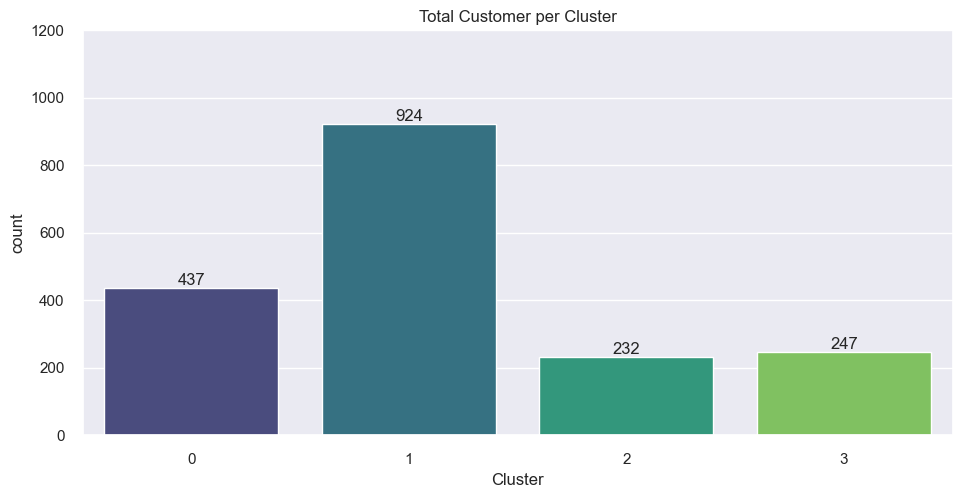

In [177]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_analisis, x="Cluster", palette="viridis")

# Tambahkan label pada setiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.ylim(0, 1200)
plt.title("Total Customer per Cluster")
plt.xlabel("Cluster")
plt.show()

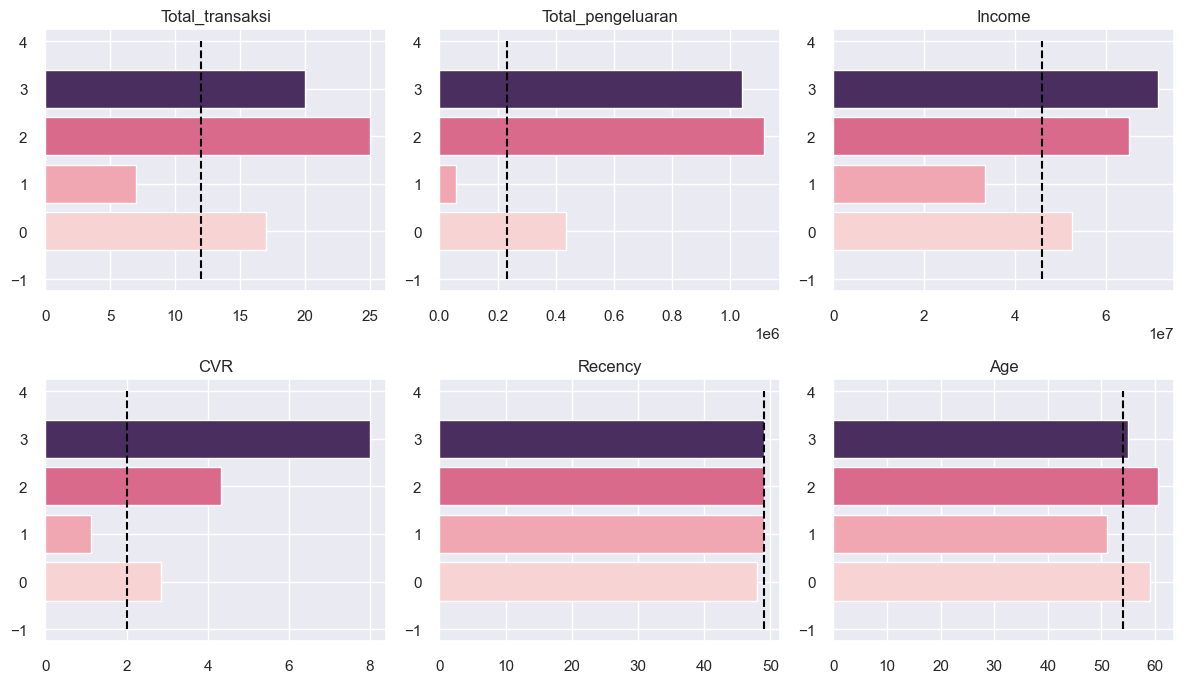

In [179]:
def dist_list(lst):
    plt.figure(figsize=[12, 7])
    
    # Kombinasi warna pastel solid yang sesuai dengan warna cluster
    pastel_colors = ['#F8D3D4', '#F1A7B1', '#DA6A8C', '#4B2E60']  # Warna mirip dengan grafik cluster
    
    i = 1
    for col in lst:
        ax = plt.subplot(2, 3, i)
        ax.vlines(df3[col].median(), ymin=-1, ymax=4, color='black', linestyle='--')
        g = df3.groupby('Cluster')
        x = g[col].median().index
        y = g[col].median().values
        
        # Menggunakan warna pastel solid untuk setiap cluster
        ax.barh(x, y, color=[pastel_colors[cluster] for cluster in x])  # Menggunakan warna sesuai index cluster
        
        plt.title(col)
        i += 1

    plt.tight_layout()
    plt.show()

# Panggil fungsi dengan kolom yang ingin divisualisasikan
dist_list(['Total_transaksi', 'Total_pengeluaran', 'Income', 'CVR', 'Recency', 'Age'])

1. Income
Cluster 0: Median income tertinggi di antara semua cluster dengan 53,127,500 (low spender). Ini menunjukkan bahwa cluster ini mungkin terdiri dari individu dengan daya beli yang lebih tinggi.
Cluster 1: Median income terendah yaitu 33,316,000 (risk of churn), menunjukkan bahwa cluster ini mungkin terdiri dari individu dengan penghasilan yang lebih rendah.
Cluster 2: Median income cukup tinggi, 70,318,500 (high spender), menunjukkan potensi daya beli yang baik.
Cluster 3: Median income sedikit lebih rendah dari cluster 2 dengan 66,465,000 (mid spender).
Insight: Cluster 0 dan Cluster 2 menunjukkan potensi pasar yang lebih tinggi dibandingkan dengan Cluster 1. Ini bisa menjadi target pemasaran yang baik untuk produk atau layanan premium.

2. Recency
Cluster 0: Median recency tertinggi di 49, menunjukkan bahwa individu dalam cluster ini baru-baru ini bertransaksi.
Cluster 1: Median recency sama dengan cluster 0, tetapi rata-rata sedikit lebih tinggi (49.34), menunjukkan frekuensi transaksi yang serupa.
Cluster 2 dan 3: Median recency sedikit lebih rendah, masing-masing 49.5 dan 47, menunjukkan potensi kurang aktifnya pelanggan di cluster ini.
Insight: Pelanggan di Cluster 0 dan 1 cenderung lebih baru dalam transaksi, yang menunjukkan mereka mungkin lebih terbuka terhadap penawaran baru dibandingkan pelanggan di Cluster 2 dan 3.

3. Total Pengeluaran
Cluster 2: Memiliki median pengeluaran tertinggi yaitu 1,483,500, menunjukkan bahwa cluster ini mengeluarkan lebih banyak uang.
Cluster 3: Juga tinggi, dengan median 2,038,000.
Cluster 0 dan Cluster 1 memiliki pengeluaran median yang lebih rendah yaitu 695,000 dan 77,000, masing-masing.
Insight: Cluster 2 dan 3 dapat dianggap sebagai pelanggan yang lebih loyal dan cenderung menghabiskan lebih banyak uang, sehingga perlu perhatian khusus dalam penawaran dan promosi.

4. Total Transaksi
Cluster 3: Memiliki jumlah transaksi median tertinggi 25, menunjukkan bahwa pelanggan di cluster ini sering melakukan pembelian.
Cluster 2: Juga tinggi, dengan median 21.
Cluster 0 dan Cluster 1 memiliki jumlah transaksi median yang lebih rendah, masing-masing 17 dan 7.
Insight: Fokuskan upaya pemasaran dan strategi retensi pelanggan pada Cluster 2 dan 3, yang menunjukkan transaksi lebih sering, untuk meningkatkan loyalitas dan penjualan.

5. Age
Cluster 0 dan Cluster 3: Median umur adalah 59, menunjukkan pelanggan yang lebih dewasa.
Cluster 1: Median umur 51, yang sedikit lebih muda dibandingkan dengan dua cluster sebelumnya.
Cluster 2: Median umur terendah yaitu 56, menunjukkan bahwa kelompok ini memiliki pelanggan yang relatif lebih muda.
Insight: Strategi pemasaran yang menargetkan usia 51 ke atas mungkin lebih efektif untuk Cluster 0 dan 3, sementara pendekatan yang lebih modern dapat digunakan untuk Cluster 2 yang lebih muda.

6. CVR (Conversion Rate)
Cluster 2: Memiliki median CVR tertinggi 7.33, menunjukkan bahwa cluster ini memiliki tingkat konversi yang baik.
Cluster 3: Median CVR 4.17 juga baik tetapi lebih rendah dari Cluster 2.
Cluster 1: Median CVR terendah yaitu 1.12, menunjukkan rendahnya konversi.
Cluster 0: Median CVR 3.00 menunjukkan performa yang baik, tetapi tidak setinggi Cluster 2.
Insight: Meningkatkan strategi pemasaran untuk Cluster 1 untuk meningkatkan konversi sangat penting. Fokus pada promosi dan insentif yang dapat menarik perhatian pelanggan di cluster ini.

Kesimpulan
Target Pasar: Cluster 0 dan 2 memiliki potensi pasar yang baik untuk produk premium.
Promosi dan Strategi Pemasaran: Fokus pada pelanggan baru di Cluster 0 dan 1.
Loyalitas Pelanggan: Cluster 2 dan 3 menunjukkan loyalitas yang baik dan pengeluaran yang tinggi.
Usia dan Demografi: Sesuaikan strategi pemasaran berdasarkan demografi dan usia pelanggan di masing-masing cluster.

Berdasarkan analisis parameter, maka cluster dapat di kategorikan sebagai berikut : 
- Cluster 0
Kategori: High Income & Recent Shoppers
Deskripsi: Pelanggan dengan penghasilan tinggi dan baru-baru ini melakukan transaksi. Mereka mungkin lebih terbuka terhadap produk premium dan penawaran baru.

- Cluster 1
Kategori: Low Income & Infrequent Shoppers
Deskripsi: Pelanggan dengan penghasilan rendah dan tingkat transaksi yang jarang. Memerlukan strategi pemasaran yang lebih menarik untuk meningkatkan frekuensi pembelian.

- Cluster 2
Kategori: High Spending & Loyal Customers
Deskripsi: Pelanggan dengan pengeluaran tinggi dan jumlah transaksi yang banyak. Mereka menunjukkan loyalitas yang baik dan dapat menjadi target utama untuk promosi dan penawaran khusus.

- Cluster 3
Kategori: Moderate Income & Frequent Shoppers
Deskripsi: Pelanggan dengan penghasilan moderat tetapi melakukan transaksi dengan frekuensi tinggi. Memiliki potensi untuk meningkat menjadi pelanggan yang lebih loyal jika mendapatkan perhatian yang tepat.

1. Cluster 0: Low Spender

- Income: Rp52.6 juta (mean) tergolong rendah dibandingkan cluster lainnya. 
- Total_pengeluaran dan Total_transaksi: Keduanya rendah (Rp464.853 dan 17 transaksi).
- CVR: Cukup rendah (3.24).
- Age : 59 tahun (older = > 55 tahun)
- Total campaign : mean 0.2 Pelanggan di cluster ini hampir tidak terlibat dalam kampanye pemasaran. Ini bisa berarti tidak terlalu dipengaruhi oleh promosi atau kampanye yang dijalankan, atau tidak ditargetkan secara efektif dalam kampanye.
Kesimpulan: Pelanggan di cluster ini memiliki pendapatan yang relatif rendah, dan pengeluaran serta jumlah transaksi yang kecil, menjadikannya Low Spender.

2. Cluster 1: Risk of Churn

- Income: Rp33 juta (mean), terendah dari semua cluster.
- Total_pengeluaran dan Total_transaksi: Sangat rendah (Rp78.625 dan 7 transaksi).
- Recency: 49 hari, berarti mereka baru saja bertransaksi, namun pengeluarannya sangat kecil.
- CVR: Terendah di antara semua cluster (1.25), menandakan bahwa mereka jarang melakukan konversi.
- Age : 51 tahun (middle age = 30-55)
- Total campaign : Pelanggan ini memiliki keterlibatan paling rendah dalam kampanye pemasaran. Ini mendukung status sebagai "Risk of Churn" karena tidak terpengaruh atau tertarik pada kampanye pemasaran, sehingga potensi kehilangan pelanggan di sini tinggi.
Kesimpulan: Cluster ini berisiko churn karena pendapatan rendah, transaksi dan pengeluaran kecil, serta konversi yang sangat rendah. Oleh karena itu, termasuk dalam kategori Risk of Churn.

3. Cluster 2: High Spender

- Income: Rp66.5 juta (mean), mendekati tinggi.
- Total_pengeluaran dan Total_transaksi: Paling tinggi (Rp1.16 juta dan 25 transaksi).
- CVR: Di atas rata-rata (4.87), menunjukkan bahwa pelanggan ini sering melakukan konversi.
- age : 60.5 tahun (older = > 55 tahun)
- Total campaign : Cluster ini memiliki keterlibatan yang cukup baik dalam kampanye pemasaran. Meskipun tidak tinggi, pelanggan ini masih menunjukkan respons yang lebih tinggi terhadap kampanye dibandingkan cluster lainnya, yang sejalan dengan pengeluaran dan transaksi yang tinggi.
Kesimpulan: Pelanggan di cluster ini memiliki pengeluaran dan transaksi paling tinggi, meskipun income mereka sedikit lebih rendah dari Cluster 3. Berdasarkan perilaku belanja mereka, cluster ini termasuk High Spender.

4. Cluster 3: Mid Spender

- Income: Paling tinggi, Rp70.4 juta (mean).
- Total_pengeluaran dan Total_transaksi: Lebih rendah daripada Cluster 2 (Rp1.07 juta dan 20 transaksi).
- CVR: Paling tinggi di antara semua cluster (9.49), menandakan tingkat konversi yang sangat baik.
- age : 55 tahun (middle age = 30-55)
- Total campaign :  Cluster ini juga memiliki keterlibatan yang rendah dalam kampanye pemasaran, namun sedikit lebih tinggi dari Cluster 0 dan 1. Meskipun memiliki pengeluaran dan transaksi yang sedang, keterlibatan dalam kampanye bisa lebih ditingkatkan untuk mendorong lebih banyak pembelian.

Kesimpulan: Meski mereka memiliki pendapatan tertinggi dan CVR yang kuat, jumlah transaksi dan pengeluaran mereka lebih rendah dibandingkan Cluster 2. Ini menunjukkan mereka memiliki potensi pengeluaran besar tapi lebih jarang bertransaksi. Oleh karena itu, termasuk Mid Spender.

Cluster 2 adalah High Spender karena meskipun pendapatannya sedikit lebih rendah dari Cluster 3, pengeluaran dan transaksi paling tinggi.
Cluster 3 adalah Mid Spender, karena meskipun mereka memiliki income dan CVR tertinggi, aktivitas belanja (pengeluaran dan transaksi) sedikit lebih rendah dibandingkan Cluster 2.

### Univariate Analisis

In [183]:
variable = [ 'Recency', 'Total_transaksi', 'Total_pengeluaran', 'Income', 'NumWebVisitsMonth', 'Total_campaign', 'CVR', 'Membership_Years', 'NumDealsPurchases', 'Age', 'Education_encode']

ValueError: num must be an integer with 1 <= num <= 10, not 11

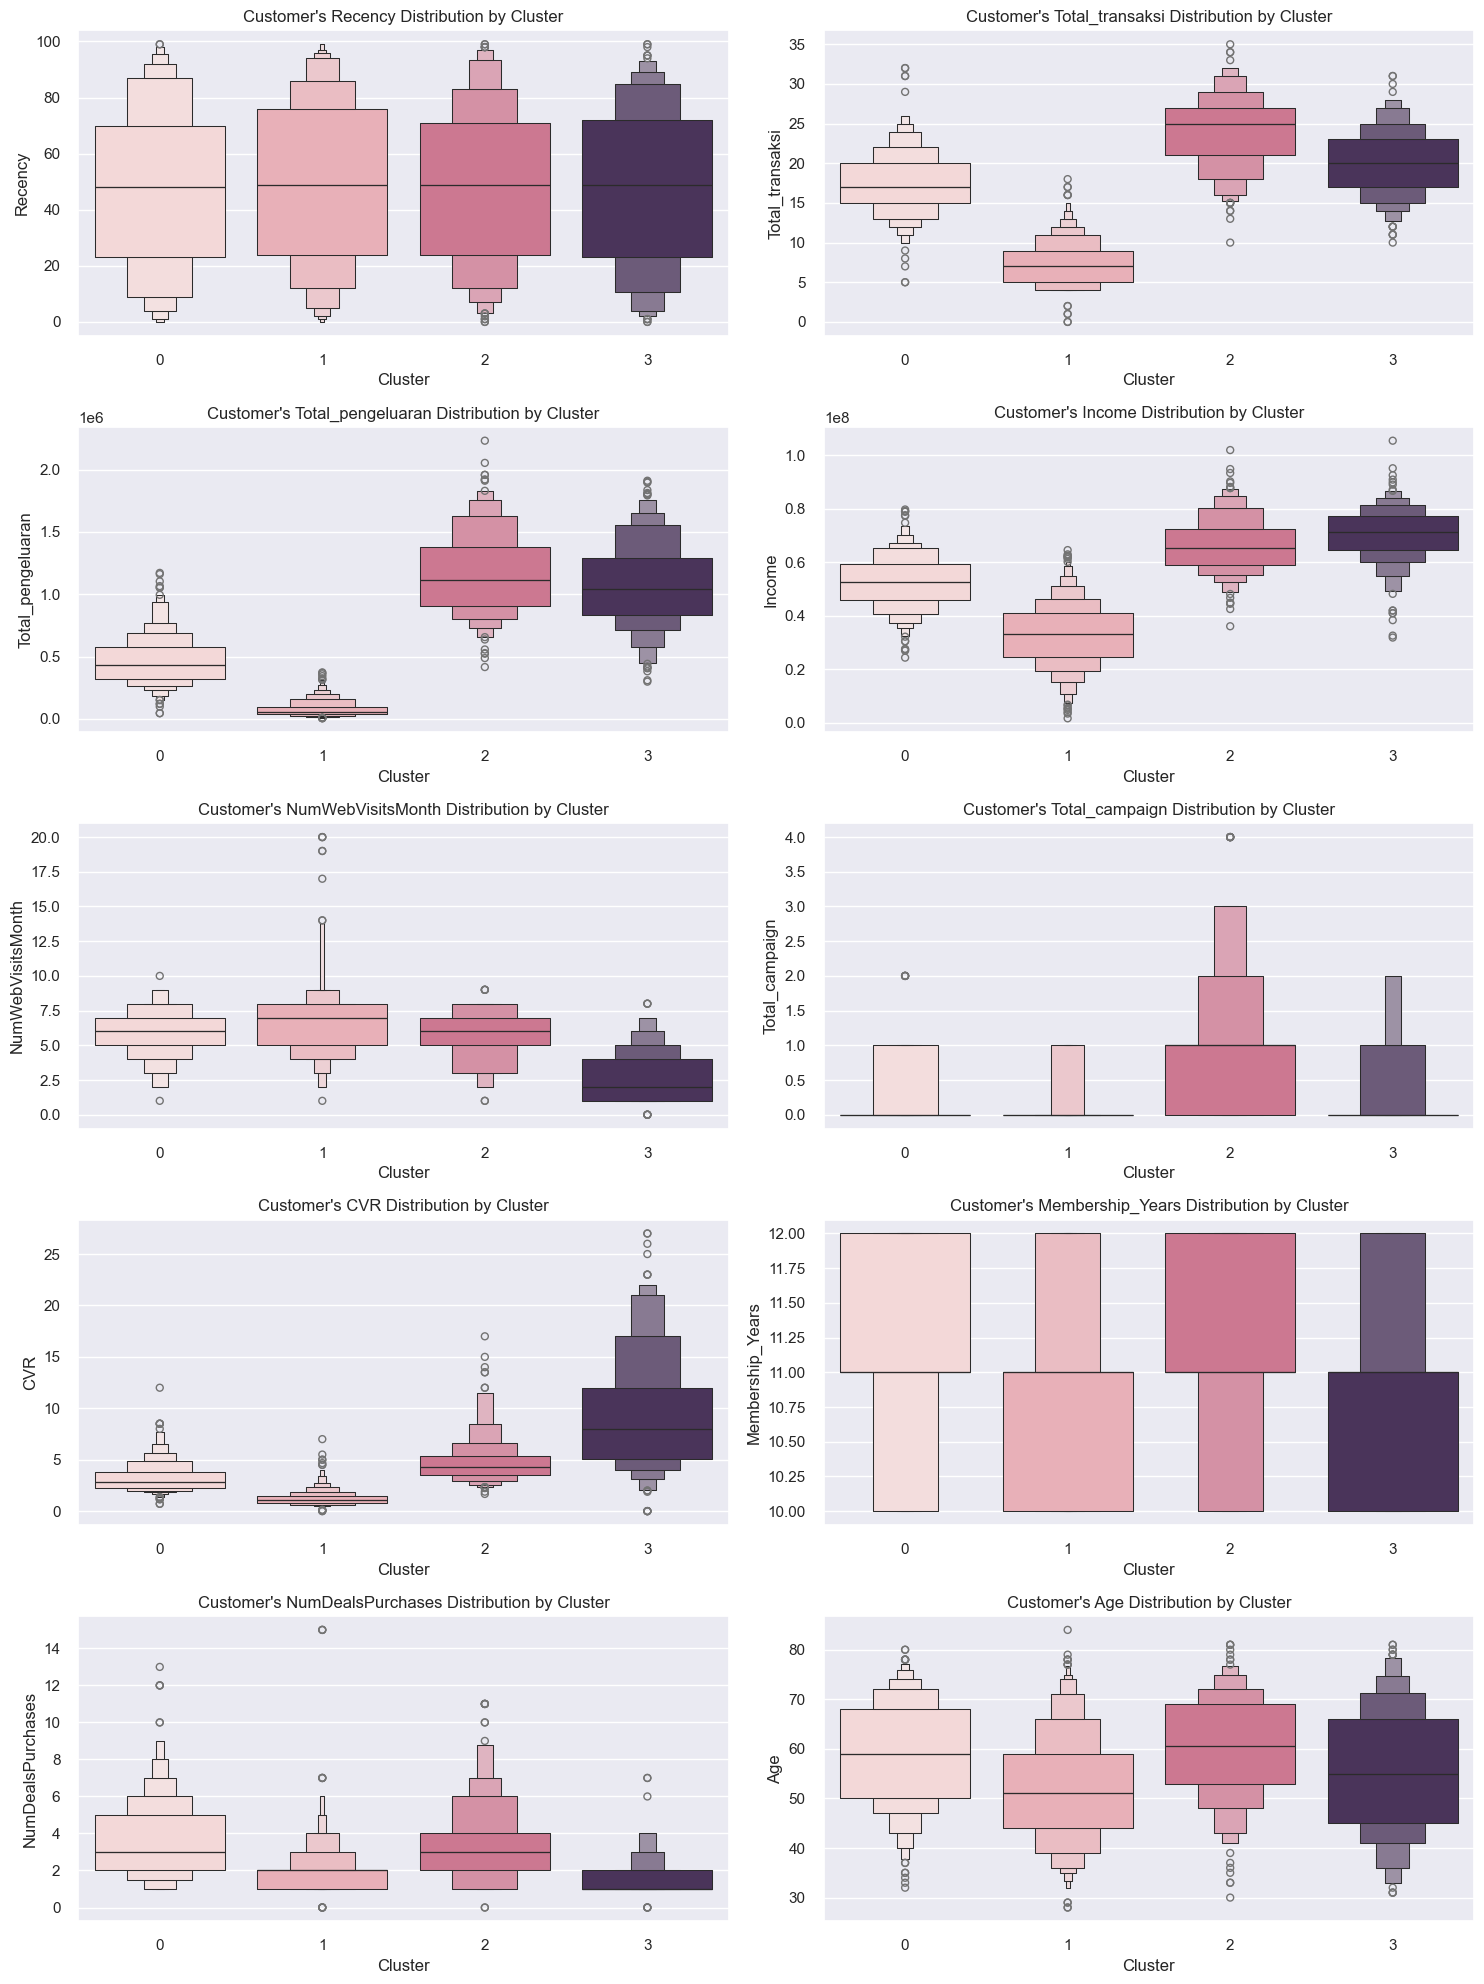

In [185]:
# distribusi cluster
pastel_colors = ['#F8D3D4', '#F1A7B1', '#DA6A8C', '#4B2E60']

plt.figure(figsize=(15, 20))
for i in range(0, len(variable)):
    plt.subplot(5, 2, i+1)
    sns.boxenplot(x='Cluster', y=df3[variable[i]], data=df3, palette=pastel_colors).set(title=f"Customer's {variable[i]} Distribution by Cluster")
    plt.tight_layout()

Cluster 1 (Risk of Churn) memiliki jumlah pelanggan terbanyak, tetapi distribusi total campaign paling sedikit. Penting untuk mengoptimalkan strategi pemasaran untuk meningkatkan keterlibatan dan mengurangi risiko churn. Penawaran yang menarik dan promosi yang sesuai bisa mendorong frekuensi transaksi mereka.

Cluster 3 (Mid Spender) adalah yang paling banyak menerima campaign. Mereka menunjukkan potensi tinggi untuk menjadi pelanggan setia dengan seringnya bertransaksi. Strategi pemasaran yang berfokus pada mereka dapat meningkatkan loyalitas dan nilai jangka panjang.

Cluster 2 (High Spender) memiliki CVR tinggi meskipun tidak sering mengunjungi situs. Ini menunjukkan bahwa mereka adalah pelanggan yang berharga, meskipun tidak aktif. Strategi yang meningkatkan interaksi dan mengingatkan mereka tentang penawaran dapat meningkatkan respons terhadap campaign dan frekuensi kunjungan.

### Multivariate Analisis

In [ ]:
pastel_colors = ['#F8D3D4', '#F1A7B1', '#DA6A8C', '#4B2E60']

sns.lmplot(y='Income', x='Total_pengeluaran', hue='Cluster', fit_reg=False, data=df3, palette=pastel_colors, scatter_kws={'s':20, 'alpha':0.8}).set(
    title='Regression plot Income vs Total Spending by Cluster')

Grafik menunjukkan bahwa Cluster 2 (High Spender) dan Cluster 3 (Mid Spender) berada dalam satu kelompok, mengindikasikan hubungan positif antara tingkat pendapatan dan pengeluaran pelanggan. Hal ini berarti pelanggan dengan pendapatan moderat (Cluster 3) cenderung berbelanja lebih sering, sementara pelanggan berpendapatan tinggi (Cluster 2) menunjukkan loyalitas dan pengeluaran yang lebih besar.

Dengan pemahaman ini, perusahaan dapat mengoptimalkan strategi pemasaran dengan menyesuaikan penawaran produk dan promosi untuk kedua cluster, meningkatkan loyalitas dan mendorong peningkatan penjualan, serta menciptakan pengalaman belanja yang lebih menarik bagi kedua segmen pelanggan.

# Rekomendasi Bisnis

1. Cluster 0: Low Spender
Strategi:
- Targetkan Kampanye Berbasis Diskon atau Promosi: Pelanggan di cluster ini mungkin lebih sensitif terhadap harga. Tawarkan diskon khusus atau program loyalty untuk mendorong mereka melakukan lebih banyak transaksi.
- Tingkatkan Keterlibatan Melalui Komunikasi Personal: Gunakan email marketing yang lebih personal dan relevan untuk menarik perhatian pelanggan. Kampanye khusus seperti penawaran produk yang relevan dengan usia mereka (kelompok usia >55 tahun) dapat meningkatkan minat mereka.
- Optimalkan Produk dengan Harga Terjangkau: Karena pengeluaran mereka rendah, pertimbangkan untuk menawarkan paket atau produk yang lebih sesuai dengan anggaran mereka.
- Rekomendasi: Tingkatkan frekuensi dan relevansi kampanye pemasaran serta berikan insentif tambahan untuk pembelian agar pelanggan ini lebih sering bertransaksi.

2. Cluster 1: Risk of Churn
Strategi:
- Penawaran Khusus untuk Mencegah Churn: Karena kelompok ini memiliki risiko tinggi untuk churn, berikan penawaran eksklusif seperti diskon atau hadiah untuk transaksi berikutnya dalam jangka waktu yang terbatas.
- Kampanye Re-engagement: Kampanye pemasaran re-engagement yang menawarkan konten menarik atau produk yang sesuai dapat digunakan untuk membujuk mereka kembali bertransaksi. Fokus pada keterlibatan yang lebih tinggi melalui berbagai platform (email, SMS, atau notifikasi aplikasi).
- Penawaran Berbasis Nilai: Karena pendapatan mereka lebih rendah, tawarkan program penghematan, seperti penawaran bundling produk atau penawaran gratis ongkir untuk menarik minat mereka.
- Rekomendasi: Buat kampanye re-engagement yang lebih personal dan relevan serta berikan penawaran menarik untuk mengurangi risiko churn pada pelanggan ini.

3. Cluster 2: High Spender
Strategi:
- Loyalty Program dan Eksklusivitas: Karena pelanggan di cluster ini sering bertransaksi dan mengeluarkan uang yang lebih banyak, tawarkan program loyalitas yang memberikan akses eksklusif ke produk premium atau penawaran eksklusif.
- Upsell dan Cross-sell: Pelanggan ini memiliki kemampuan pengeluaran yang tinggi. Tawarkan produk pelengkap atau tingkatkan nilai pembelian mereka dengan penawaran upsell yang relevan.
- Peningkatan Keterlibatan dalam Kampanye: Kampanye yang lebih dipersonalisasi dengan penekanan pada pengalaman pengguna (contoh: undangan acara eksklusif atau preview produk baru) dapat meningkatkan keterlibatan mereka lebih lanjut dalam kampanye pemasaran.
- Rekomendasi: Fokus pada mempertahankan dan meningkatkan loyalitas dengan memberikan keuntungan eksklusif dan meningkatkan penawaran upsell dan cross-sell.

4. Cluster 3: Mid Spender
Strategi:
- Penawaran Berbasis Frekuensi: Meskipun mereka berpenghasilan tinggi, pelanggan ini cenderung kurang sering bertransaksi dibandingkan Cluster 2. Tawarkan insentif untuk pembelian lebih sering, seperti program loyalty yang mendorong frekuensi transaksi.
- Personalisasi Produk dan Penawaran: Karena mereka memiliki CVR tertinggi, pastikan produk dan promosi yang ditawarkan sangat relevan dengan kebutuhan dan preferensi mereka. Segmentasikan kampanye pemasaran berdasarkan minat produk yang mereka beli sebelumnya.
- Optimalkan Promosi untuk Produk Premium: Karena mereka memiliki pendapatan tertinggi, tawarkan produk premium atau eksklusif untuk mendorong mereka melakukan transaksi lebih banyak.
- Rekomendasi: Tingkatkan frekuensi transaksi dengan memberikan insentif khusus, sementara tetap menjaga personalisasi dalam kampanye untuk menarik perhatian pelanggan ini pada produk premium.

5. Kesimpulan:
- Low Spender (Cluster 0) perlu diberi insentif agar bertransaksi lebih banyak melalui kampanye diskon dan produk yang sesuai dengan anggaran mereka.
- Risk of Churn (Cluster 1) memerlukan strategi re-engagement yang menarik dan penawaran eksklusif untuk mencegah mereka churn.
- High Spender (Cluster 2) harus didorong dengan program loyalitas, serta upsell dan cross-sell untuk meningkatkan transaksi lebih lanjut.
- Mid Spender (Cluster 3) perlu diberi dorongan untuk meningkatkan frekuensi transaksi dengan penawaran personal dan produk premium.

# Potential Impact

A. Cluster 3 , Total pengeluaran dan Rata-Rata Pengeluaran/Transaksi

In [ ]:
df3[df3.Cluster == 3].Total_pengeluaran.sum()

In [ ]:
df3[df3.Cluster == 3].Total_pengeluaran.sum()/ df3[df3.Cluster == 3].Total_transaksi.sum()

B. Cluster 2 , Total pengeluaran dan Rata-Rata Pengeluaran/Transaksi

In [ ]:
df3[df3.Cluster == 2].Total_pengeluaran.sum()

In [ ]:
df3[df3.Cluster == 2].Total_pengeluaran.sum()/ df3[df3.Cluster == 2].Total_transaksi.sum()

### Simulasi Bisnis

Jumlah Cluster 3 (Mid Spender) memiliki 247 pelanggan, asumsi jumlah pelanggan yang berpartisipasi dalam kampanye "Bundle Lebih Hemat" adalah 20% dari total pelanggan maka: 

A. Rincian Kampanye "Bundle Lebih Hemat":
- Penawaran: Diskon 10% untuk pembelian bundle tiga produk terkait. Bundle ini ditawarkan seharga Rp150,000 (harga normal Rp180,000).
- Target: Mendorong pelanggan untuk membeli lebih banyak produk dalam satu transaksi.
- Tujuan: Meningkatkan Average Order Value (AOV) dan total pengeluaran.

Asumsi:
- Jumlah pelanggan Cluster 3: 247 pelanggan.
- Persentase yang membeli bundle: 20% (dari 247 pelanggan).
- Pengeluaran rata-rata per transaksi tanpa bundle: Rp53,623.64.

Simulasi Potensi Impact:
1. Skenario Tanpa Kampanye Bundle:
Total Pengeluaran (247 pelanggan) = 247 × Rp53,623.64
Total Pengeluaran Tanpa Kampanye = Rp13,243,034.68

2. Skenario dengan Kampanye Bundle:
Jumlah pelanggan yang membeli bundle: 20% dari 247 ≈ 49 pelanggan.
Pengeluaran dengan bundle untuk 49 pelanggan: 49 × Rp150,000 = Rp7,350,000
Pengeluaran tanpa bundle untuk 198 pelanggan: 198 × Rp53,623.64 = Rp10,613,475.72
Total Pengeluaran dengan Kampanye = Rp7,350,000 + Rp10,613,475.72 = Rp17,963,475.72

3. Potensi Impact (Kenaikan Total Pengeluaran):
Kenaikan Pengeluaran = Rp17,963,475.72 - Rp13,243,034.68
Total Kenaikan Pengeluaran = Rp4,720,441.04
Persentase Kenaikan ≈ 35.64%

Dengan kampanye "Bundle Lebih Hemat" yang berhasil menarik 20% pelanggan untuk membeli paket, perusahaan berpotensi meningkatkan total pengeluaran pelanggan di Cluster 3 sebesar Rp4,720,441.04 atau sekitar 35.64% dibandingkan tanpa kampanye ini dengan catatan bundle bisa dibuat dari produk yang sering dibeli bersama atau kategori produk yang populer. 

Rincian Biaya Kampanye Bundle "Lebih Hemat":
1. Diskon yang Diberikan:
Harga Normal Bundle (3 produk): Rp180,000
Harga Bundle setelah Diskon 10%: Rp150,000
Diskon per Bundle: Rp180,000 - Rp150,000 = Rp30,000
Jika ada 49 pelanggan (20% dari 247 pelanggan) yang membeli bundle:

Total Diskon = 49 pelanggan × Rp30,000 = Rp1,470,000

2. Biaya Promosi dan Marketing:
Misalnya, perusahaan mengeluarkan biaya untuk mempromosikan kampanye ini melalui email, sosial media, dan aplikasi, serta biaya konten kreatif.
Estimasi Biaya Promosi: Rp500,000
3. Biaya Lainnya (Opsional):
Termasuk biaya operasional atau insentif untuk staf yang bekerja pada kampanye.
Estimasi Biaya Lainnya: Rp200,000

- Total Biaya Kampanye:
Total biaya kampanye dapat dihitung sebagai berikut:

Total Biaya Diskon: Rp1,470,000
Biaya Promosi: Rp500,000
Biaya Lainnya: Rp200,000
Total Biaya Kampanye = Rp1,470,000 + Rp500,000 + Rp200,000 = Rp2,170,000

- Potensi Impact Setelah Mempertimbangkan Biaya Kampanye:
Total Kenaikan Pengeluaran dari Kampanye = Rp4,720,441.04
Total Biaya Kampanye = Rp2,170,000
Net Impact = Kenaikan Pengeluaran - Biaya Kampanye = Rp4,720,441.04 - Rp2,170,000 = Rp2,550,441.04

Dengan biaya kampanye sebesar Rp2,170,000, perusahaan dapat memperoleh kenaikan pengeluaran bersih dari pelanggan sebesar Rp2,550,441.04 atau sekitar 18.9% dari total pengeluaran awal tanpa kampanye.